In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import plotly.express as px
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score, 
    confusion_matrix, 
    classification_report,
    roc_curve, 
    precision_recall_curve, 
    average_precision_score,
    balanced_accuracy_score,
    cohen_kappa_score,
    matthews_corrcoef
)
%matplotlib inline

In [2]:
col_names=["buying","maint","doors","persons","lug_boot","safety","class"]
df=pd.read_csv("/kaggle/input/car-evaluation/car_evaluation.csv.csv",names=col_names)

In [3]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
df.shape

(1728, 7)

In [5]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


# Encode categorical variables for certain visualizations

In [7]:
label_encoders={}

df_encoded = df.copy()
le = LabelEncoder()
for column in df.columns:
    df_encoded[column] = le.fit_transform(df[column])
    label_encoders[column]=le

for column,le in label_encoders.items():
    print(f"\nColumns : {column}")
    print("Category to Encoded Value Mapping:")

    for category,encoded_value in zip(le.classes_,range(len(le.classes_))):
        print(f" {category} ===> {encoded_value}")


Columns : buying
Category to Encoded Value Mapping:
 acc ===> 0
 good ===> 1
 unacc ===> 2
 vgood ===> 3

Columns : maint
Category to Encoded Value Mapping:
 acc ===> 0
 good ===> 1
 unacc ===> 2
 vgood ===> 3

Columns : doors
Category to Encoded Value Mapping:
 acc ===> 0
 good ===> 1
 unacc ===> 2
 vgood ===> 3

Columns : persons
Category to Encoded Value Mapping:
 acc ===> 0
 good ===> 1
 unacc ===> 2
 vgood ===> 3

Columns : lug_boot
Category to Encoded Value Mapping:
 acc ===> 0
 good ===> 1
 unacc ===> 2
 vgood ===> 3

Columns : safety
Category to Encoded Value Mapping:
 acc ===> 0
 good ===> 1
 unacc ===> 2
 vgood ===> 3

Columns : class
Category to Encoded Value Mapping:
 acc ===> 0
 good ===> 1
 unacc ===> 2
 vgood ===> 3


In [8]:
import pickle
file = open('label_encoders.pkl', 'wb')
pickle.dump(label_encoders, file)
file.close()

# 1. Count Plots for each categorical feature

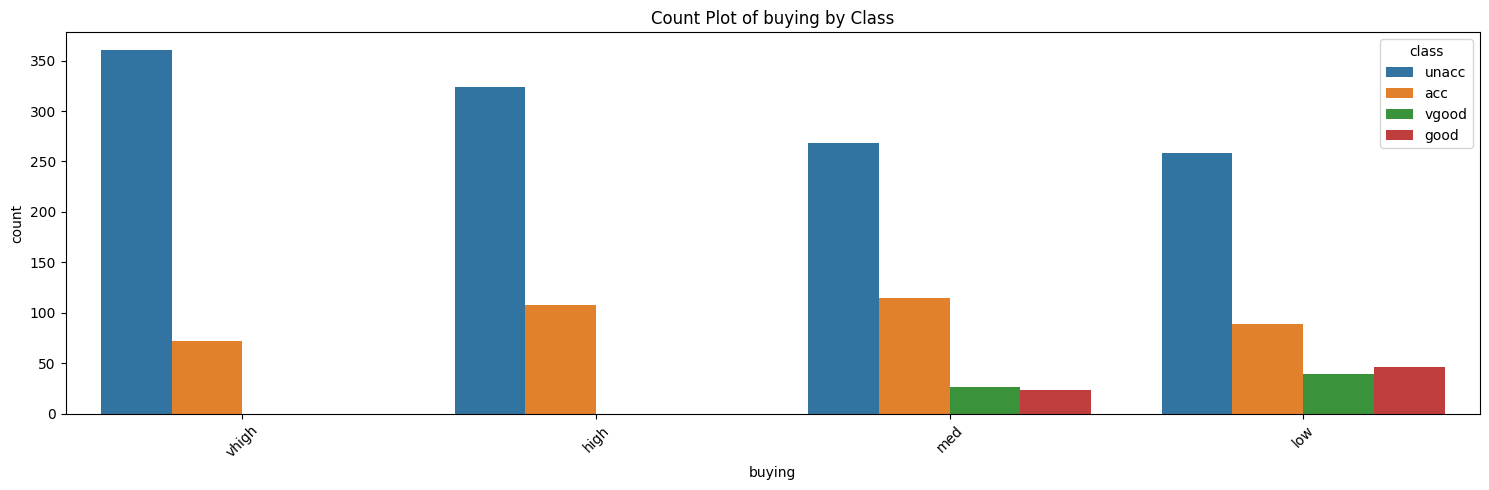

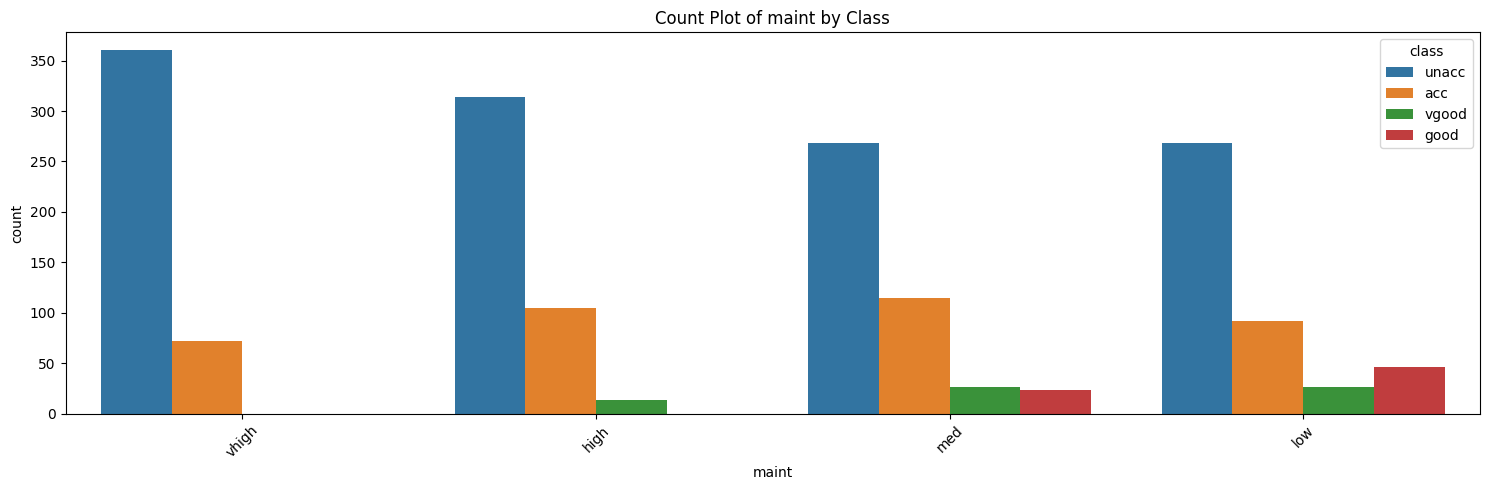

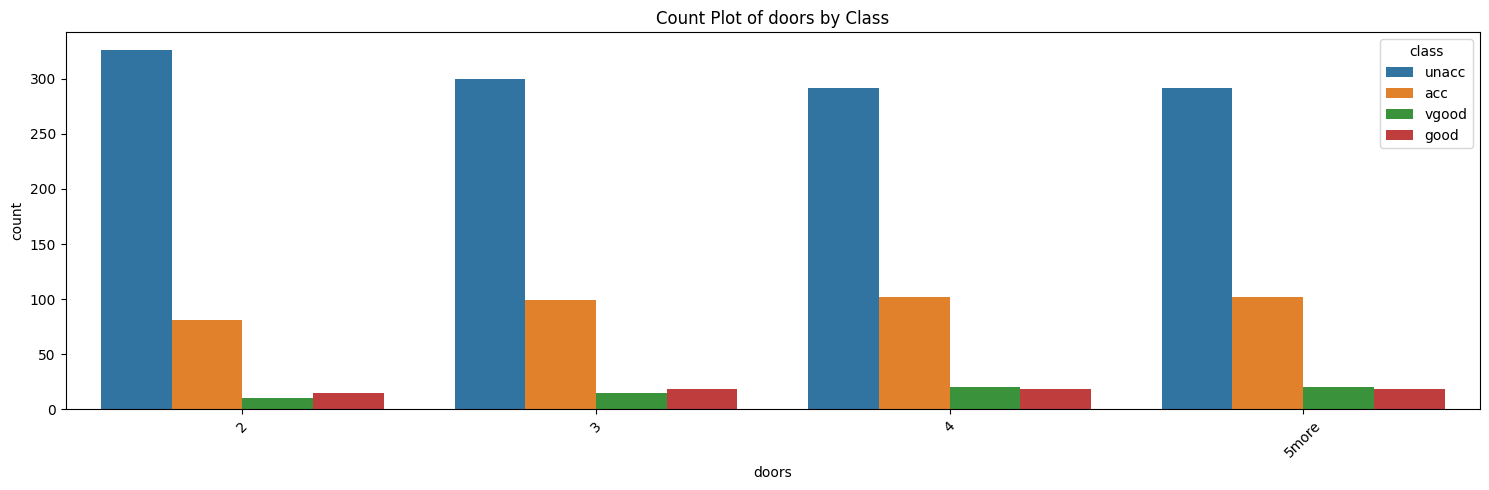

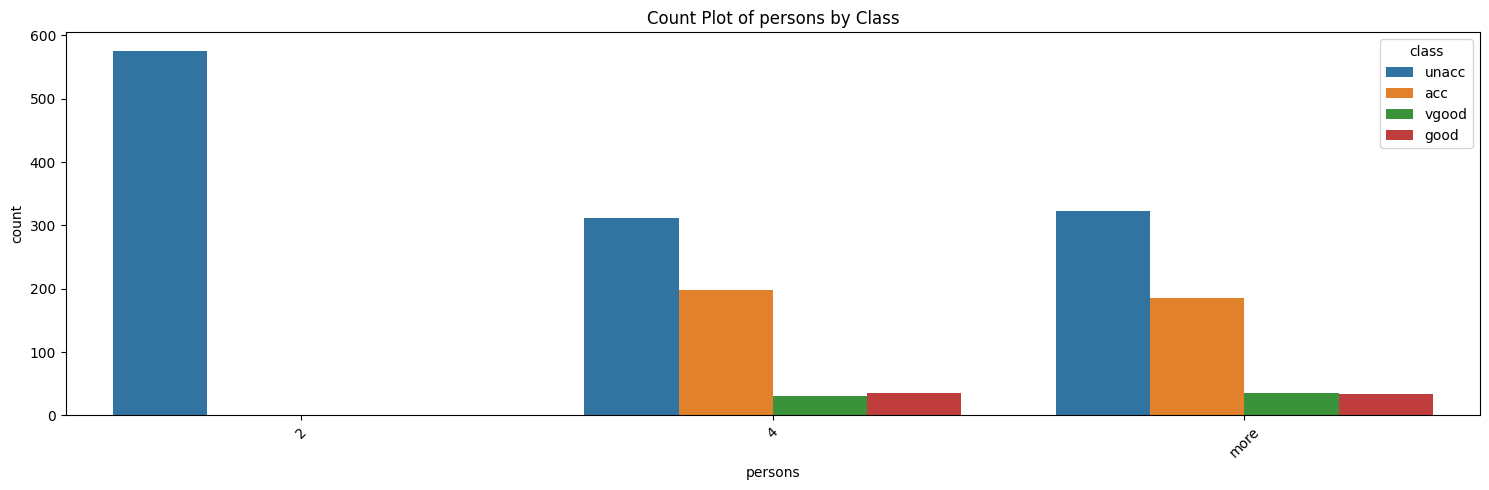

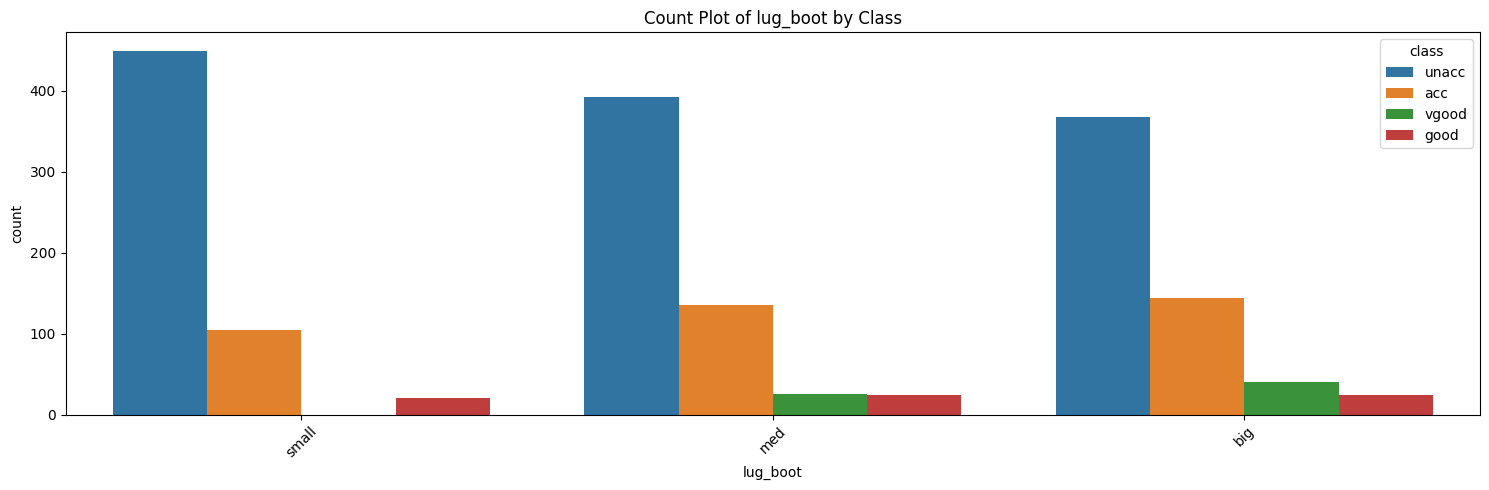

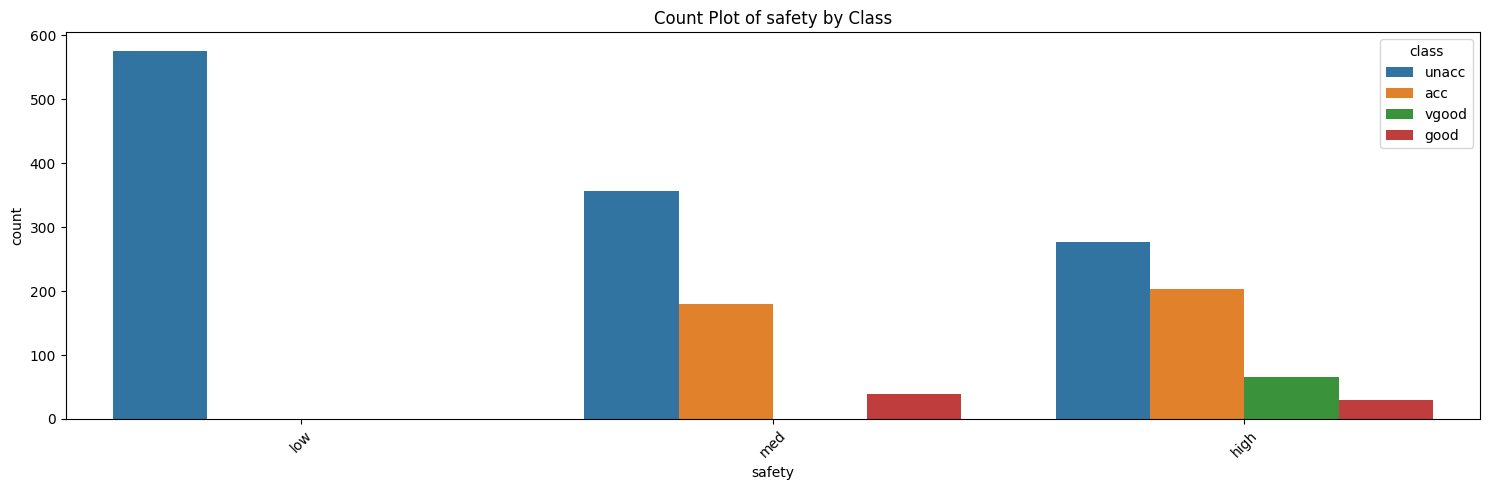

In [9]:
for column in df.columns[:-1]:  # Exclude 'class'
    plt.figure(figsize=(15,5))
    sns.countplot(data=df, x=column, hue='class')
    plt.title(f'Count Plot of {column} by Class')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 2. Bar Plot for Class Distribution

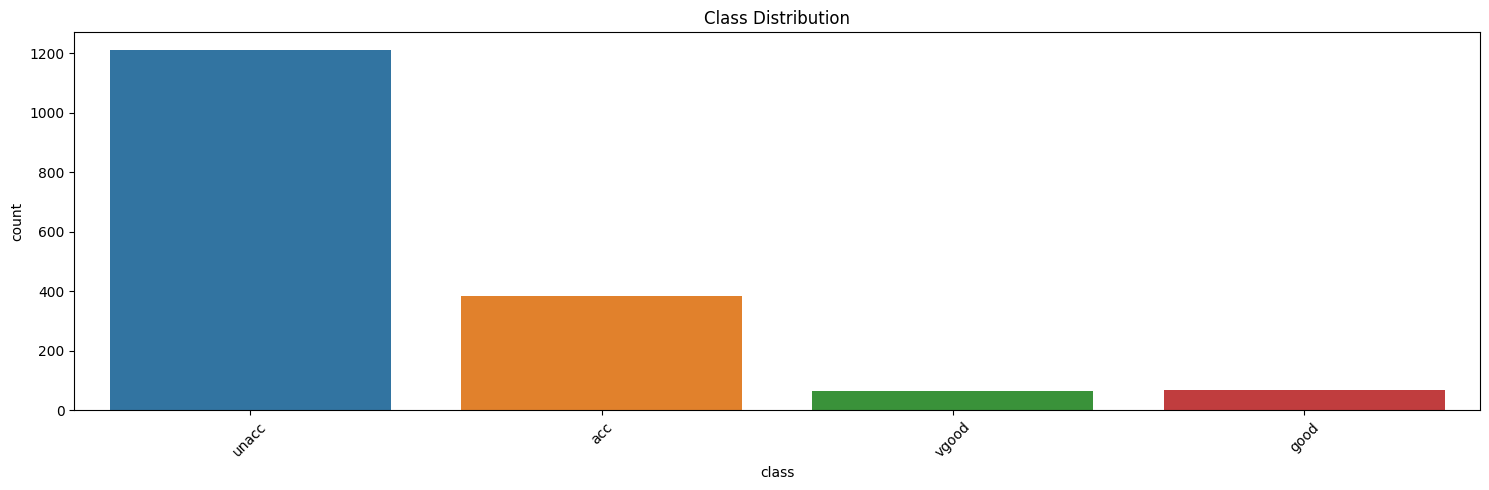

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='class')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Heatmap of Correlations (using encoded data)

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


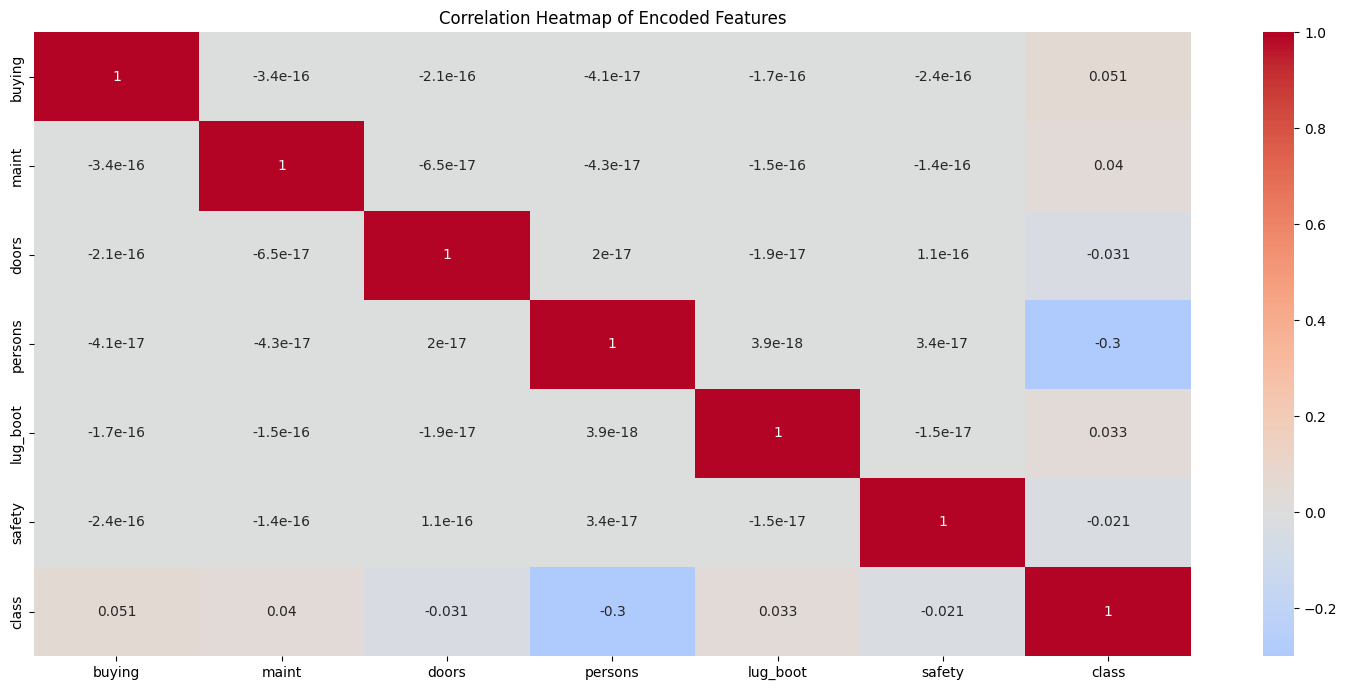

In [11]:
plt.figure(figsize=(15,7))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Encoded Features')
plt.tight_layout()
plt.show()

# 4. Pair Plot (using encoded data)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

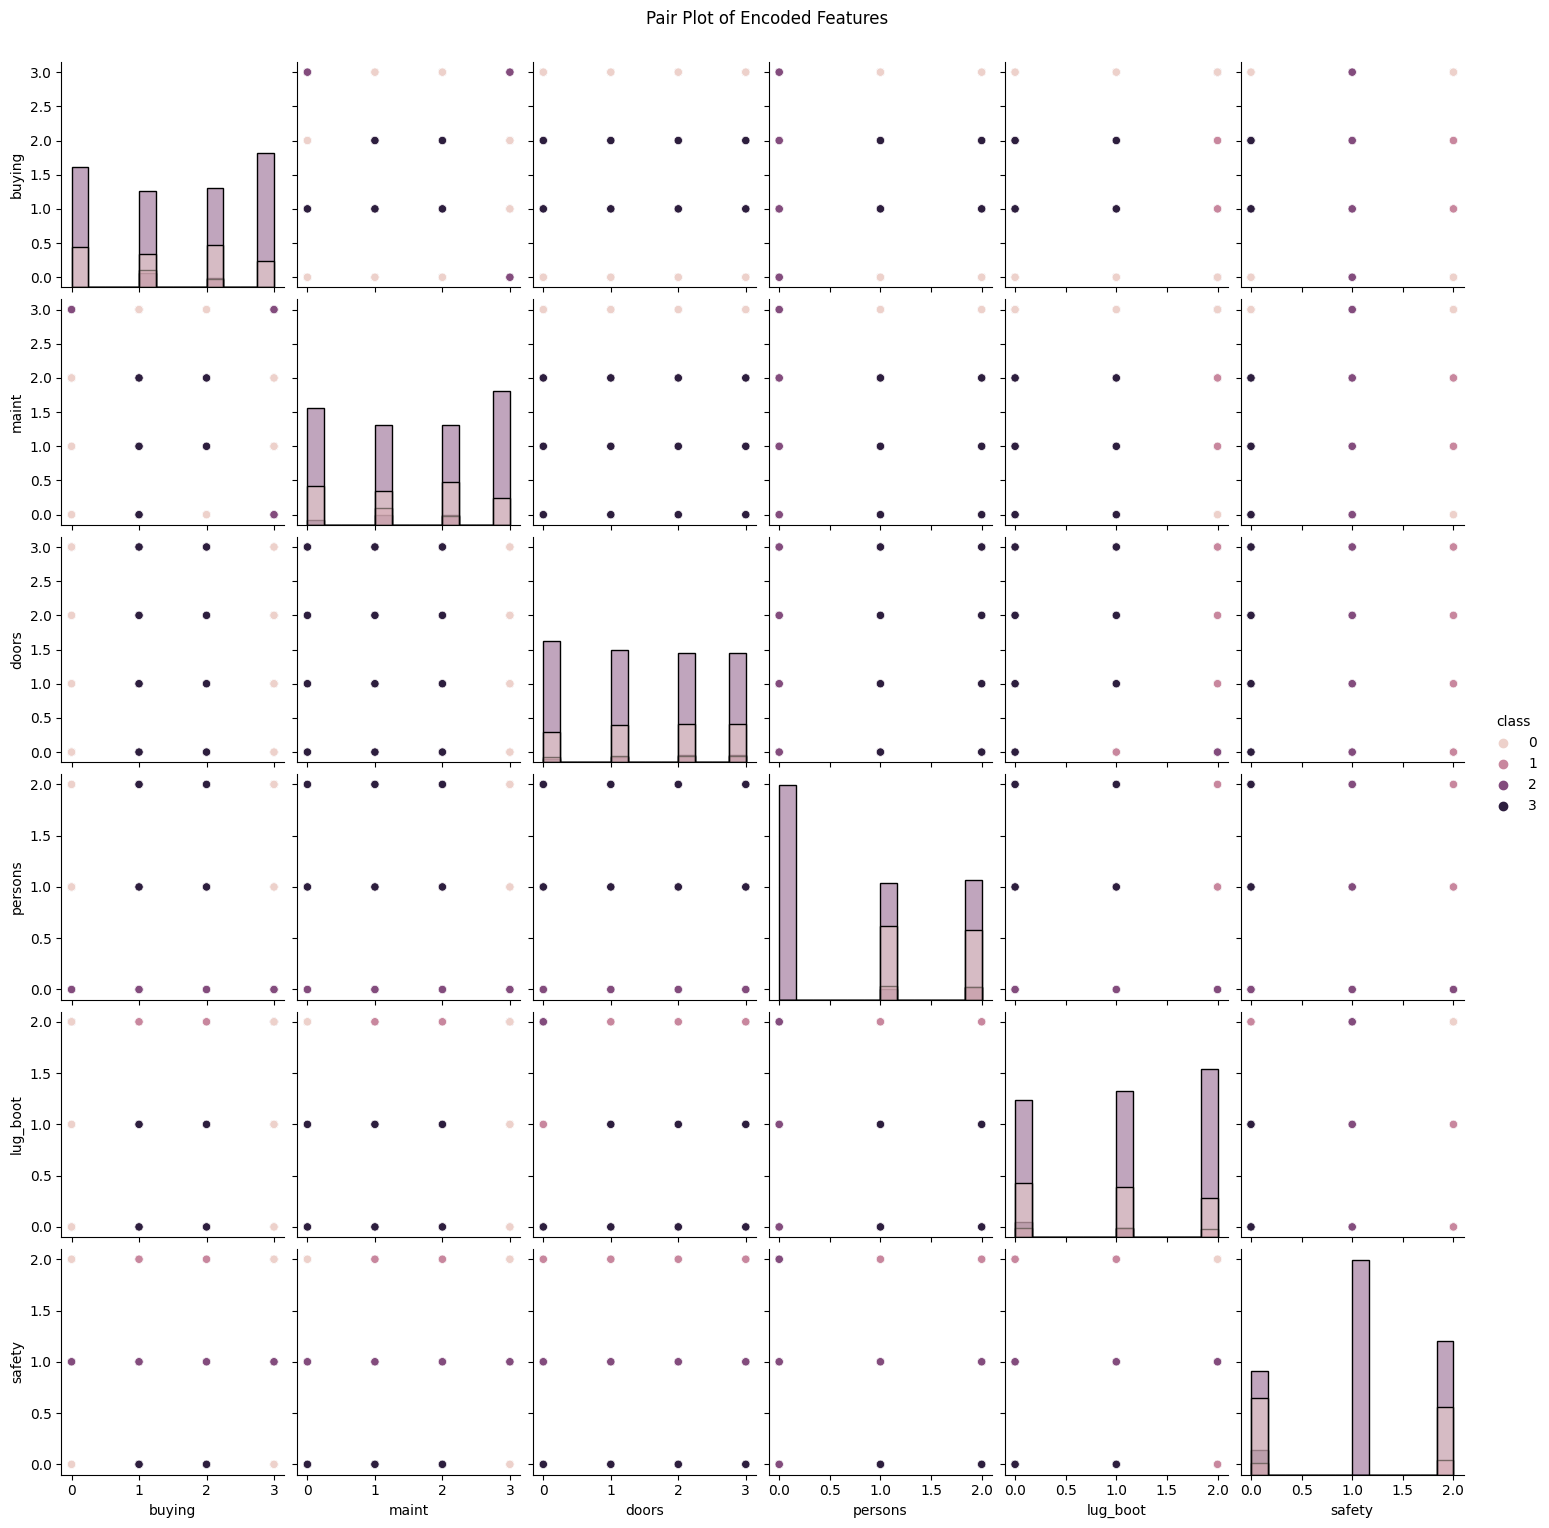

In [12]:
sns.pairplot(df_encoded, hue='class', diag_kind='hist')
plt.suptitle('Pair Plot of Encoded Features', y=1.02)
plt.show()


# 5. Box Plots (using encoded data, for each feature by class)

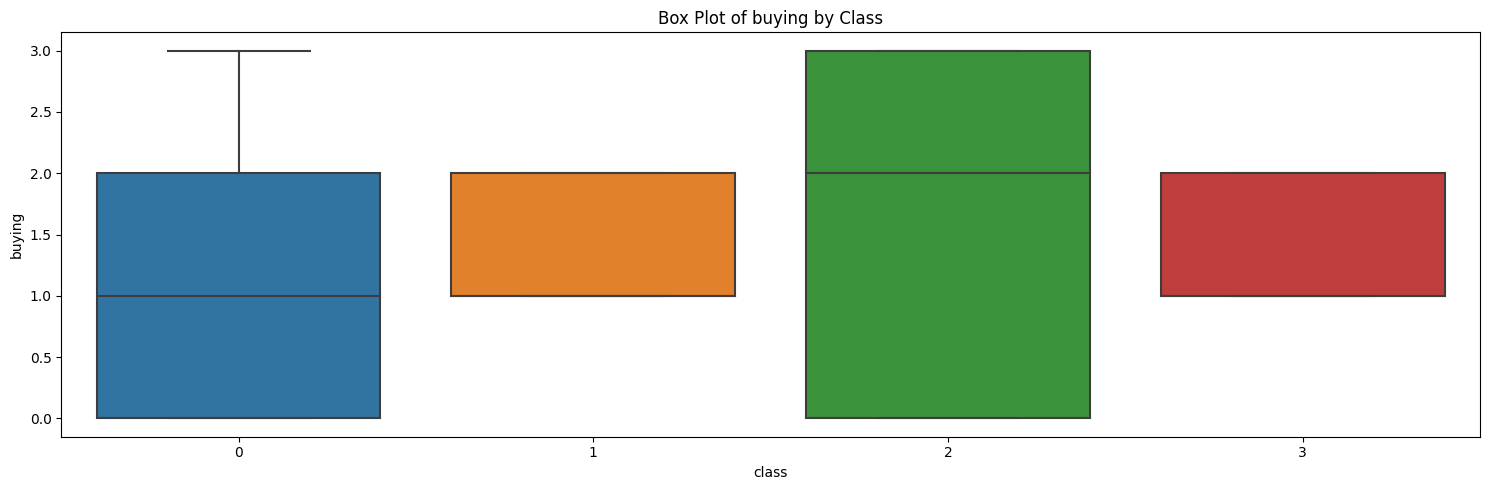

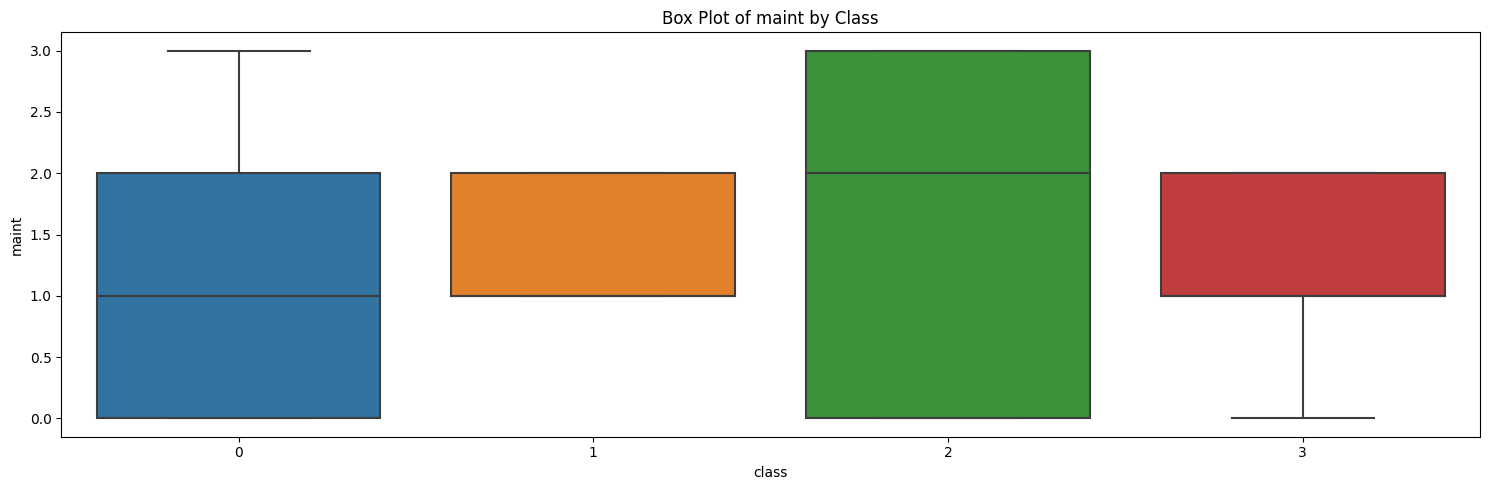

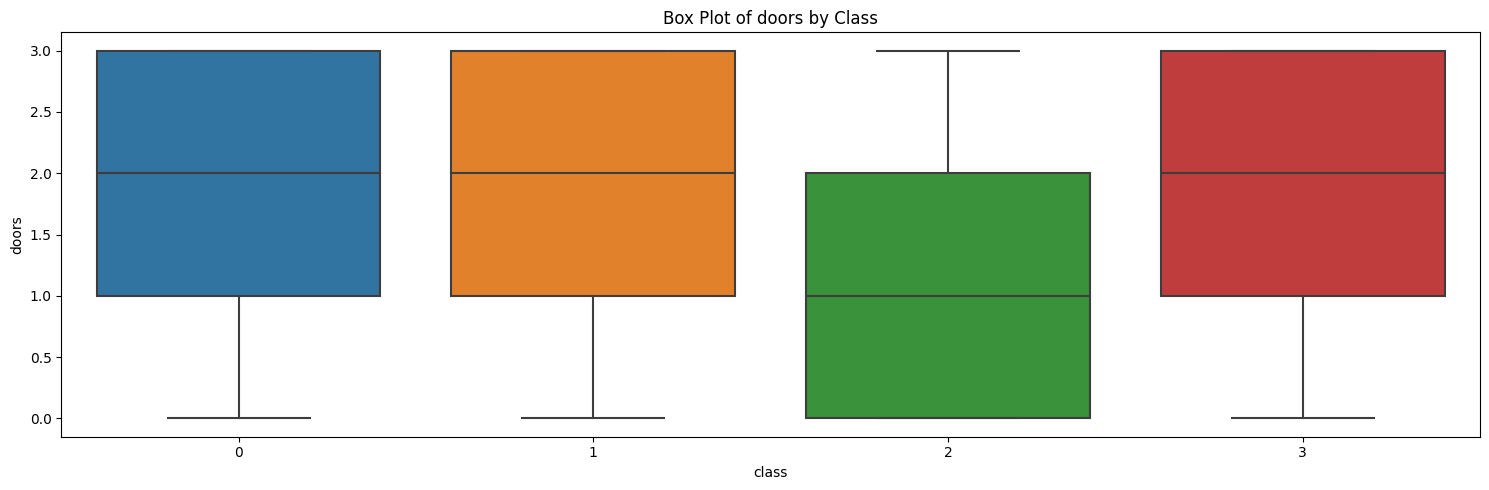

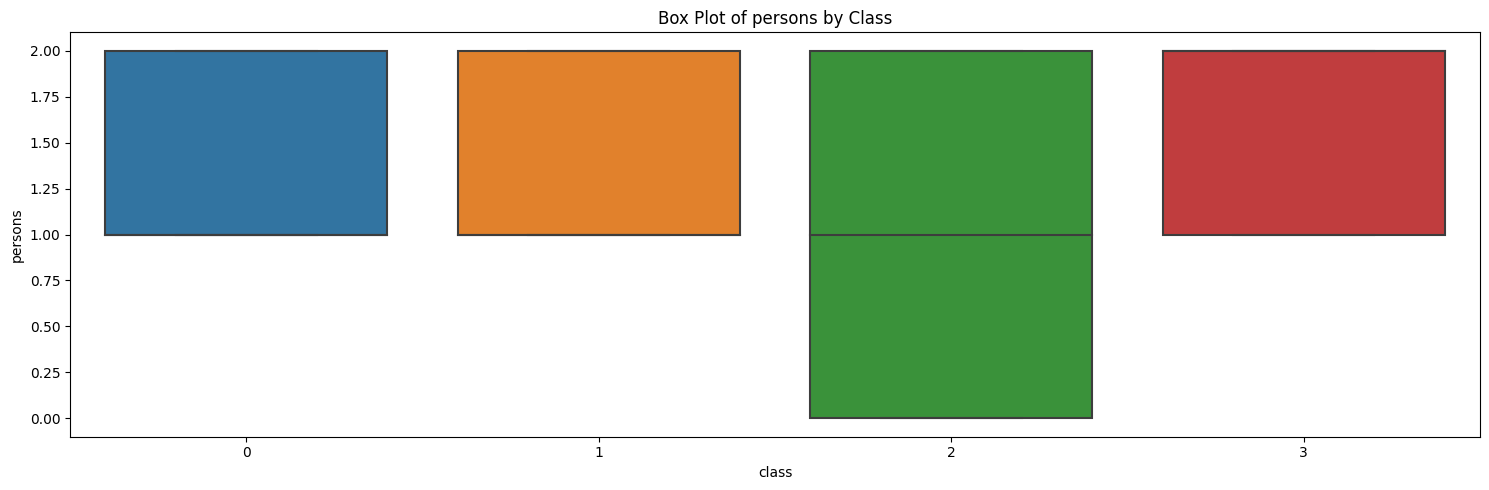

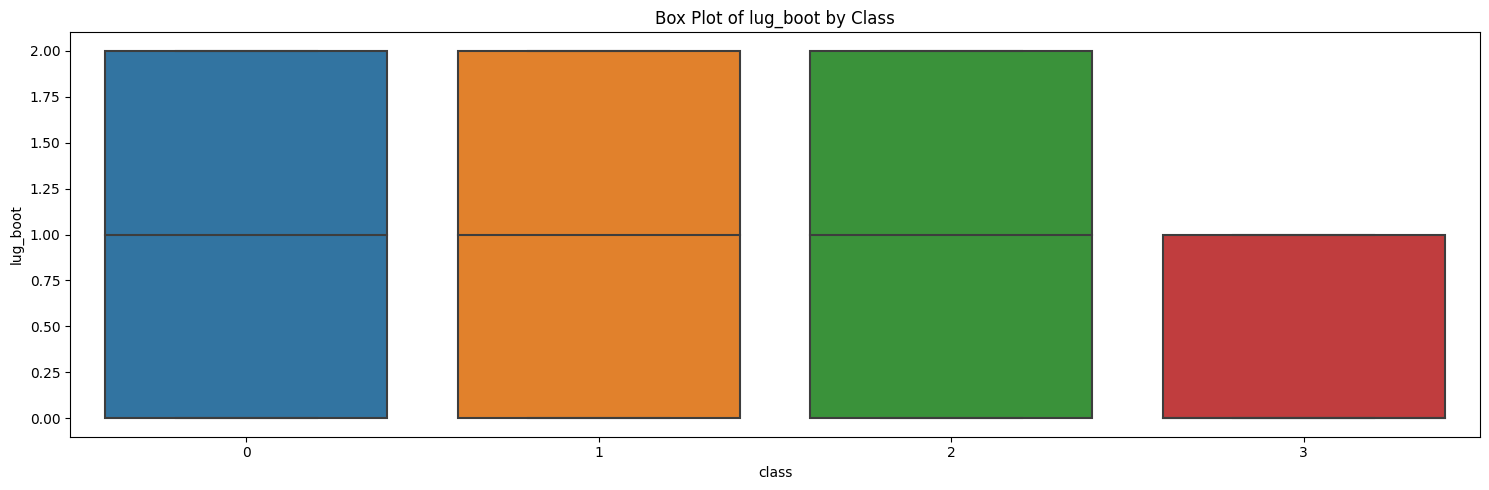

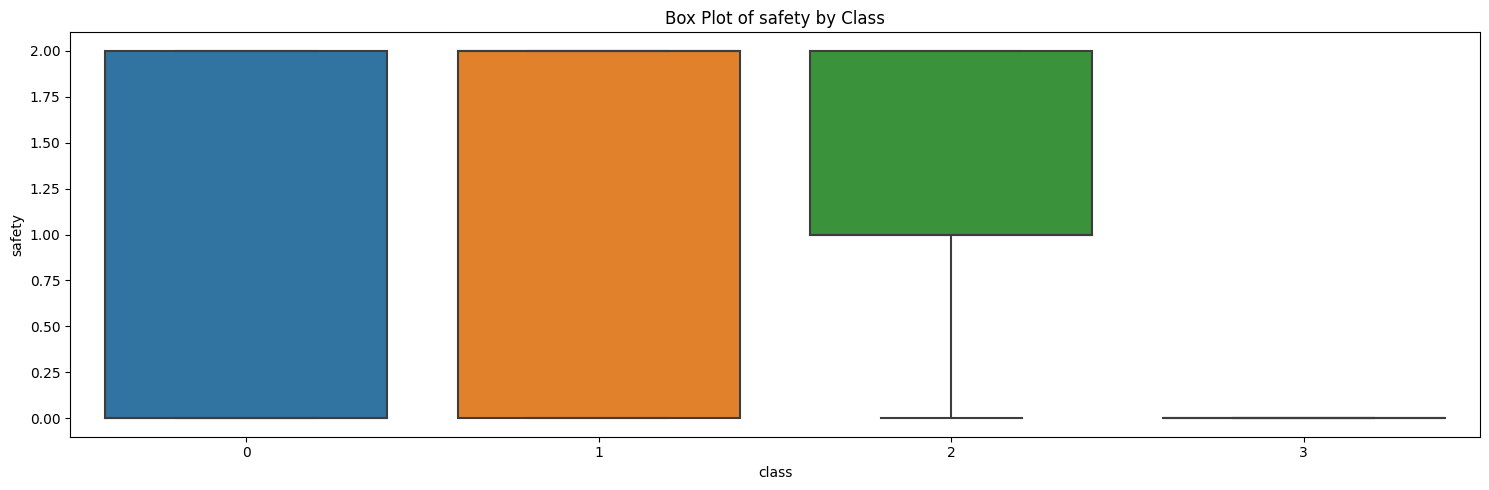

In [13]:
for column in df_encoded.columns[:-1]:
    plt.figure(figsize=(15,5))
    sns.boxplot(data=df_encoded, x='class', y=column)
    plt.title(f'Box Plot of {column} by Class')
    plt.tight_layout()
    plt.show()


# 6. Pie Chart for Class Distribution

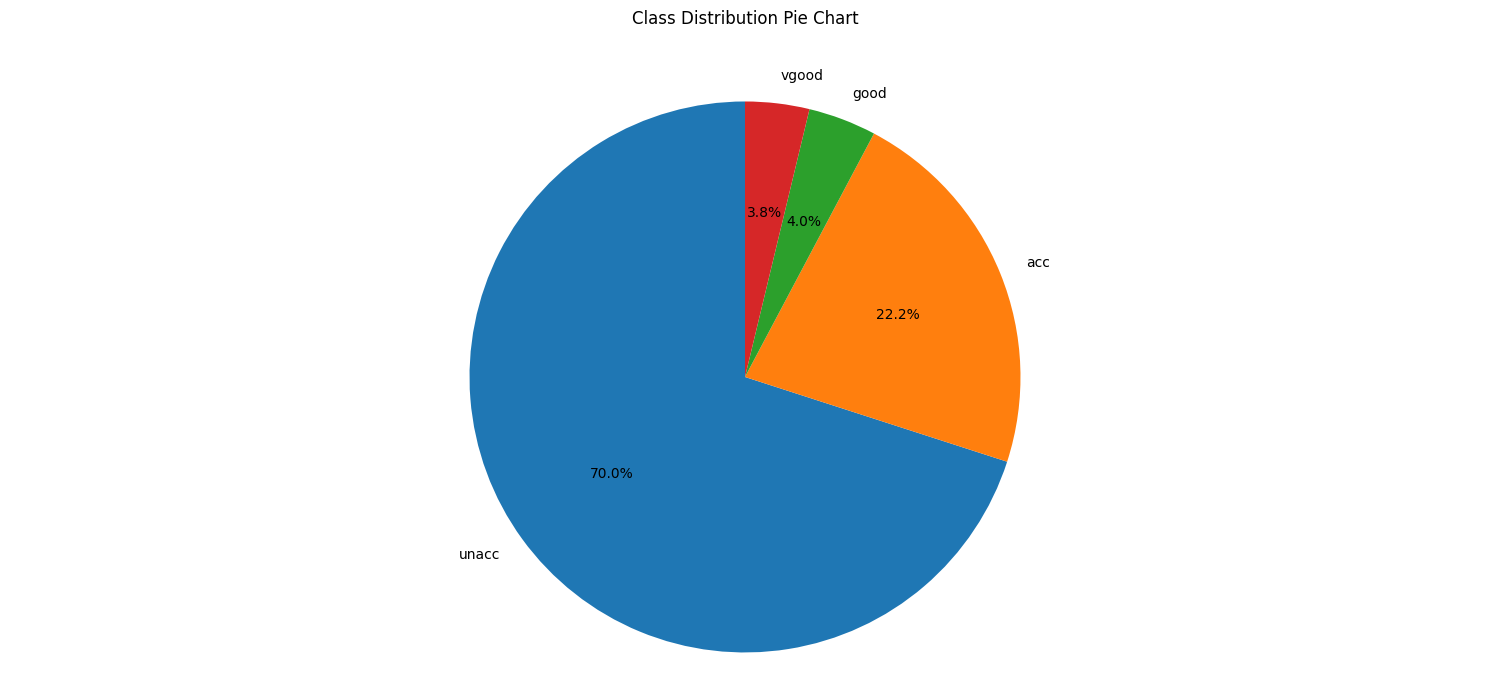

In [14]:
plt.figure(figsize=(15,7))
df['class'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution Pie Chart\n\n')
plt.ylabel('')
plt.axis("equal")
plt.tight_layout()
plt.show()

# 7. Mosaic Plot for Feature-Class Interactions

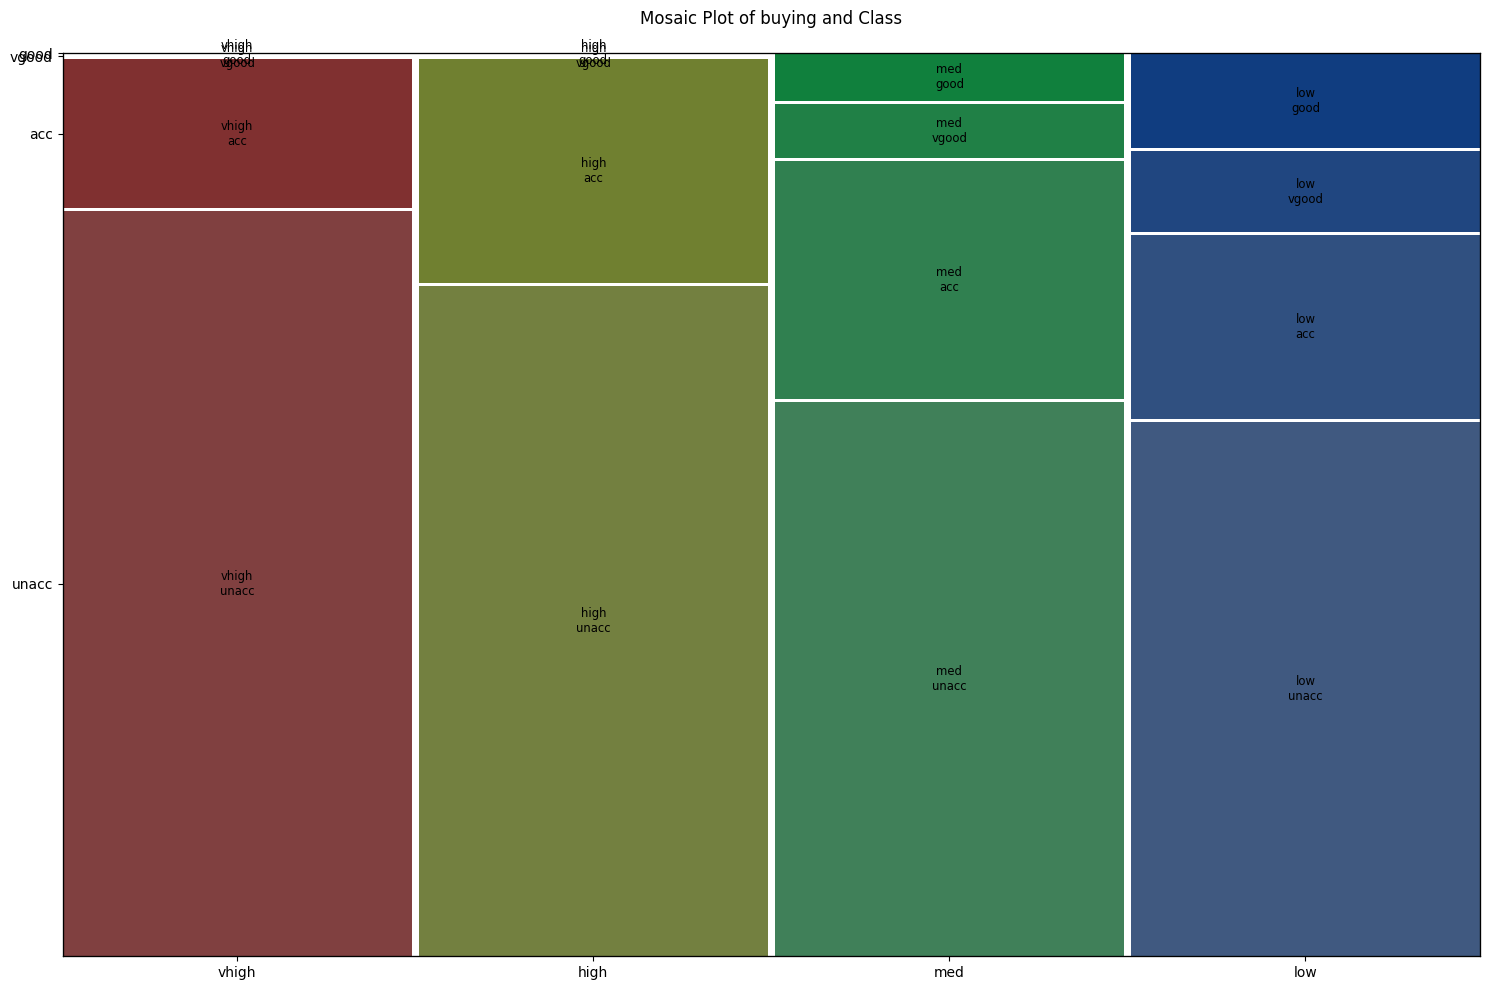

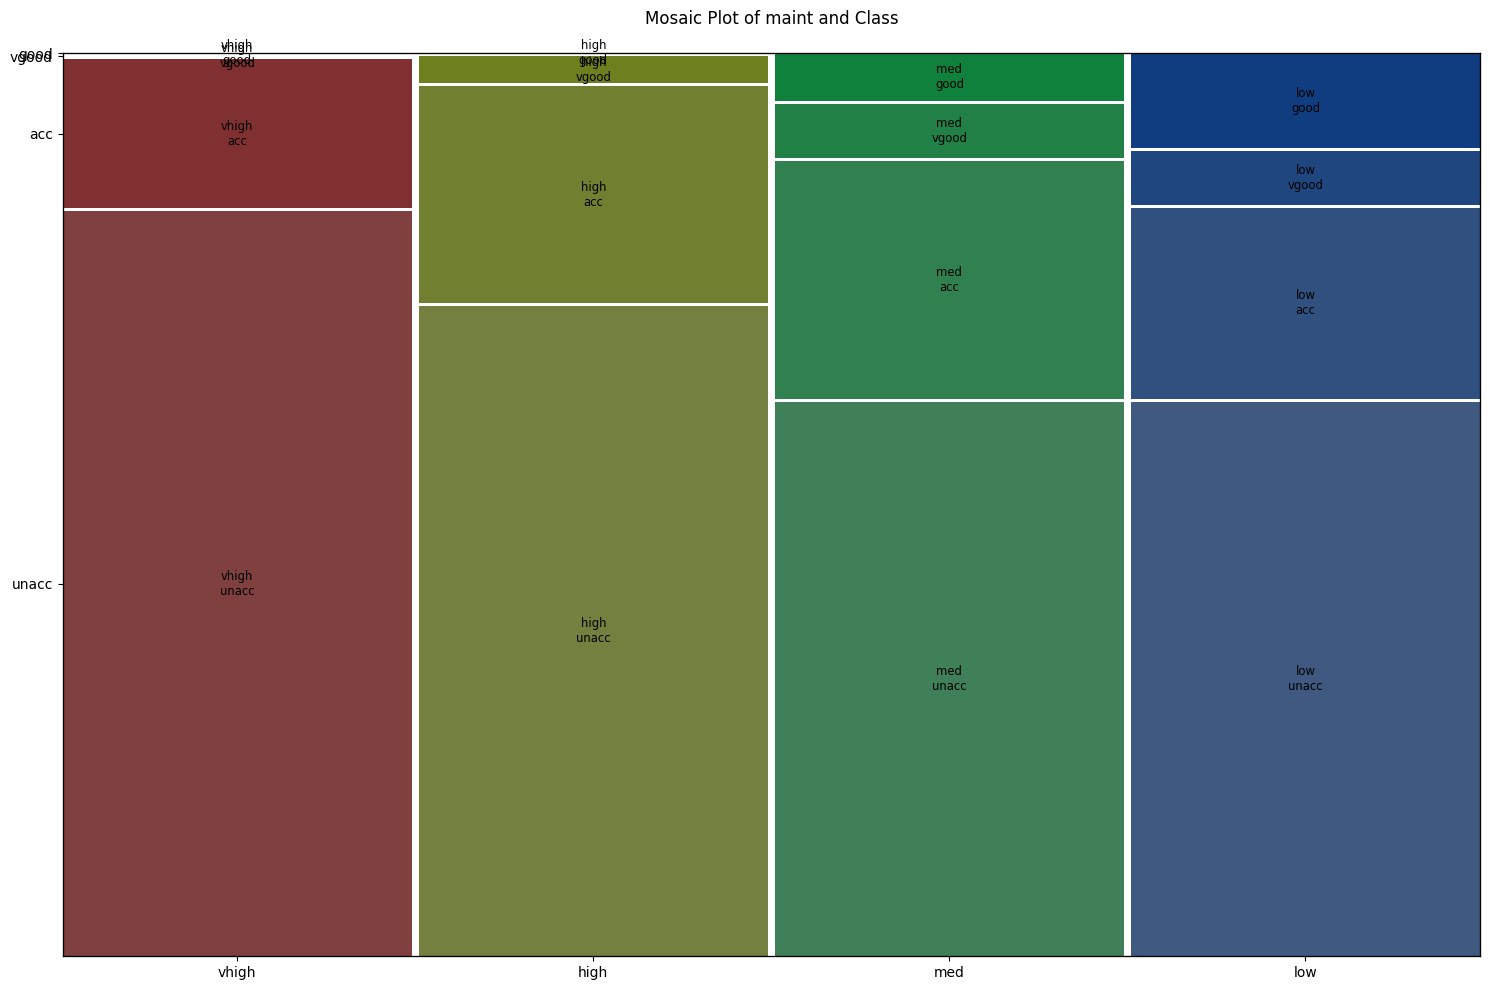

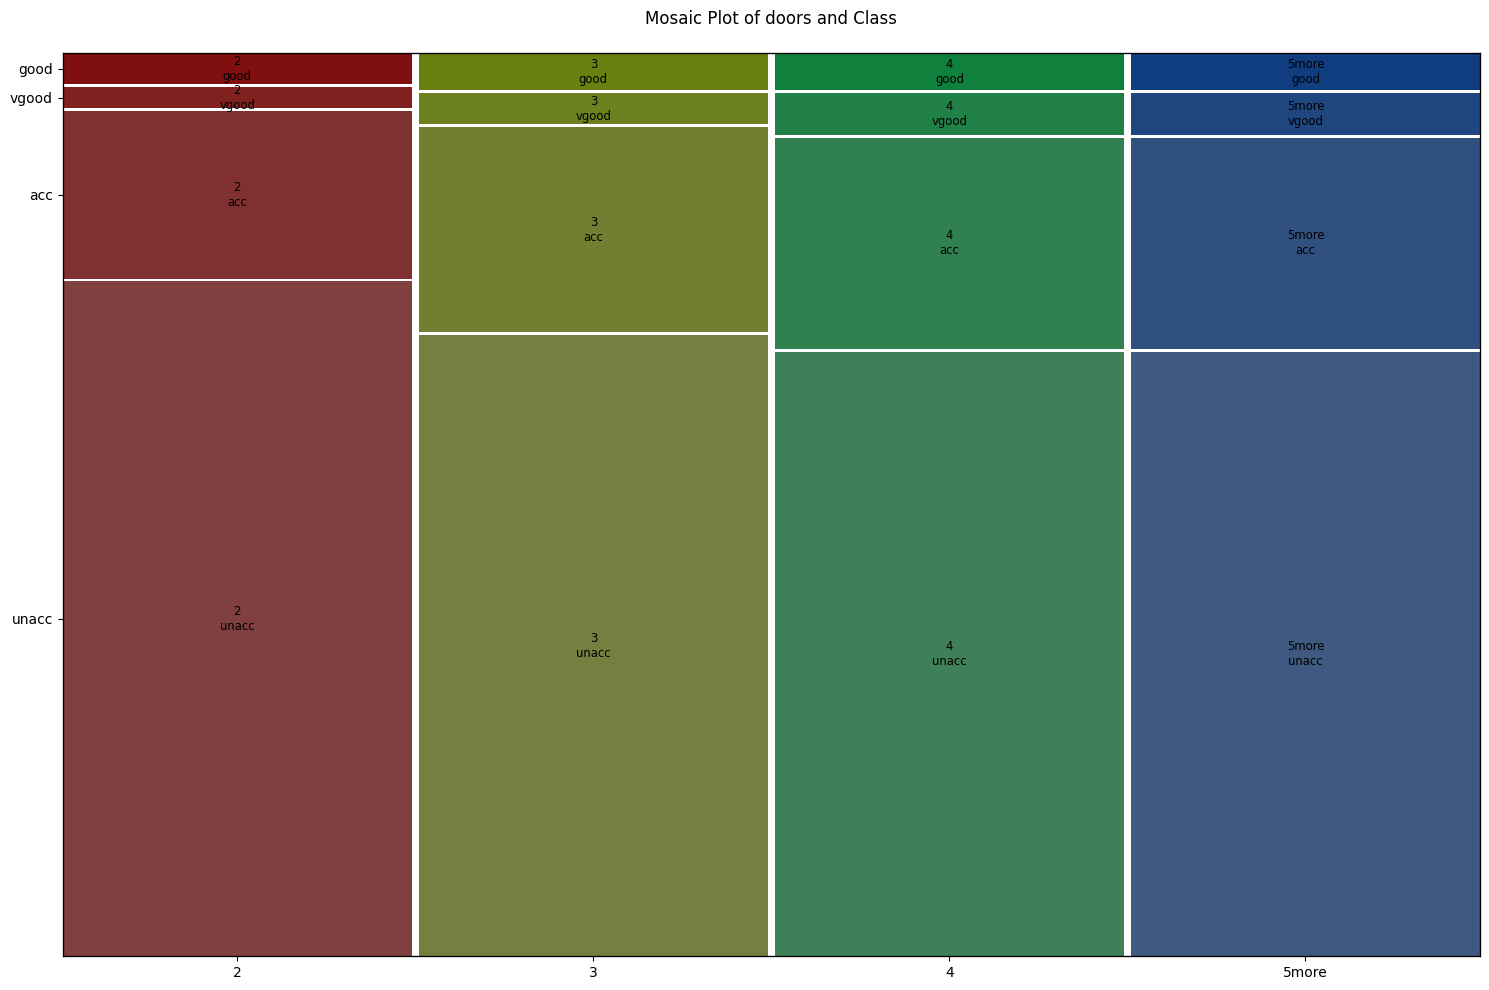

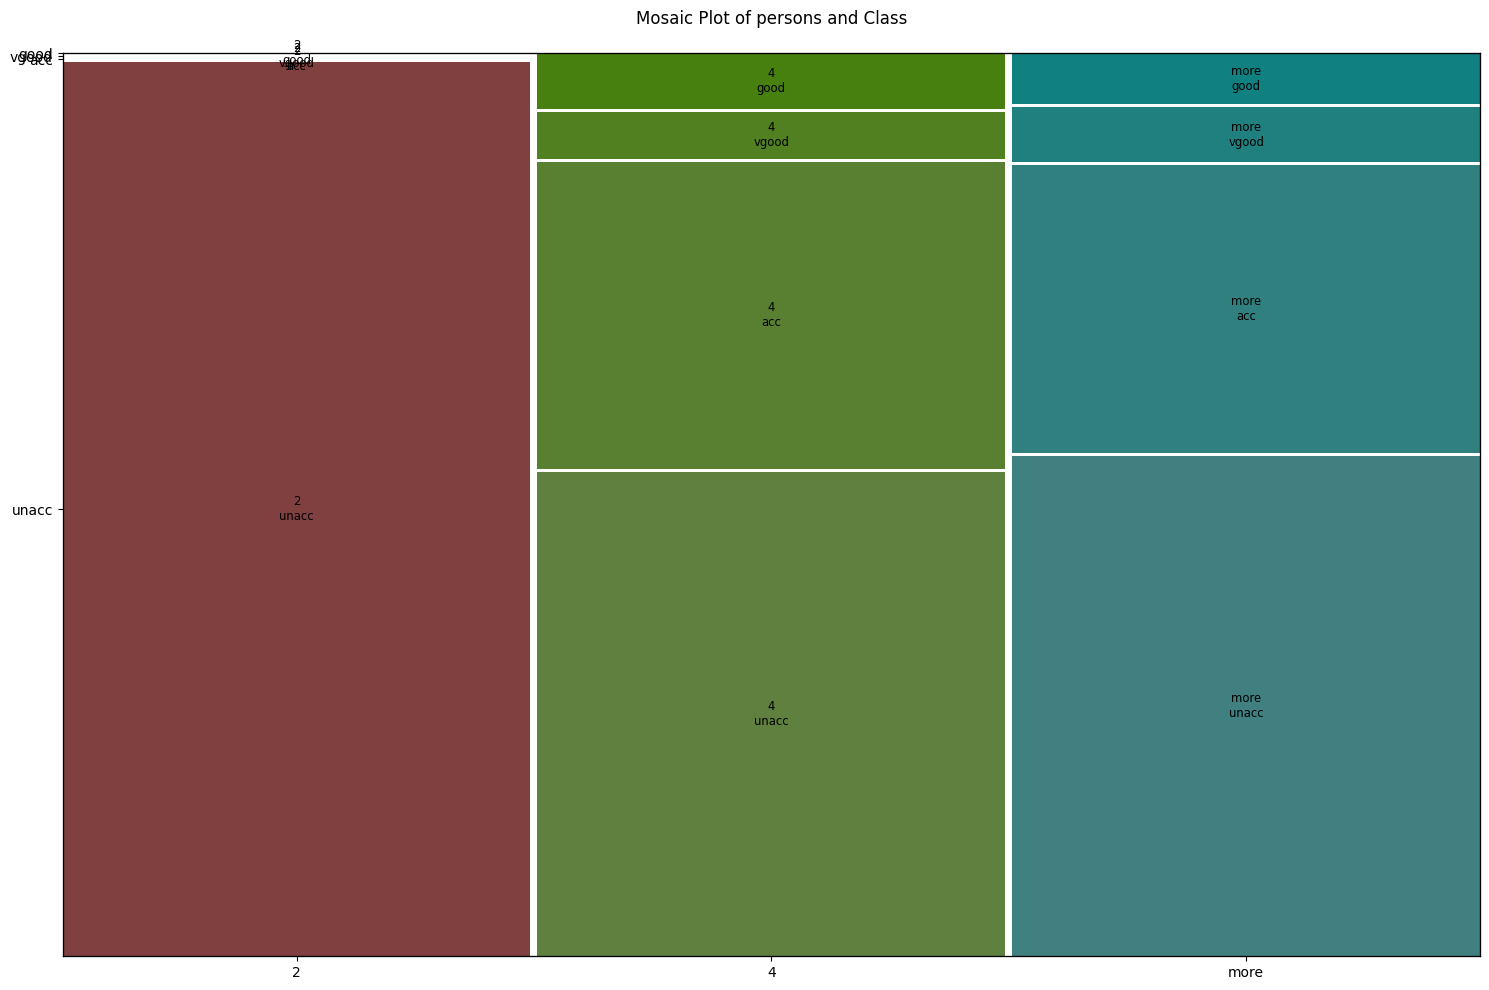

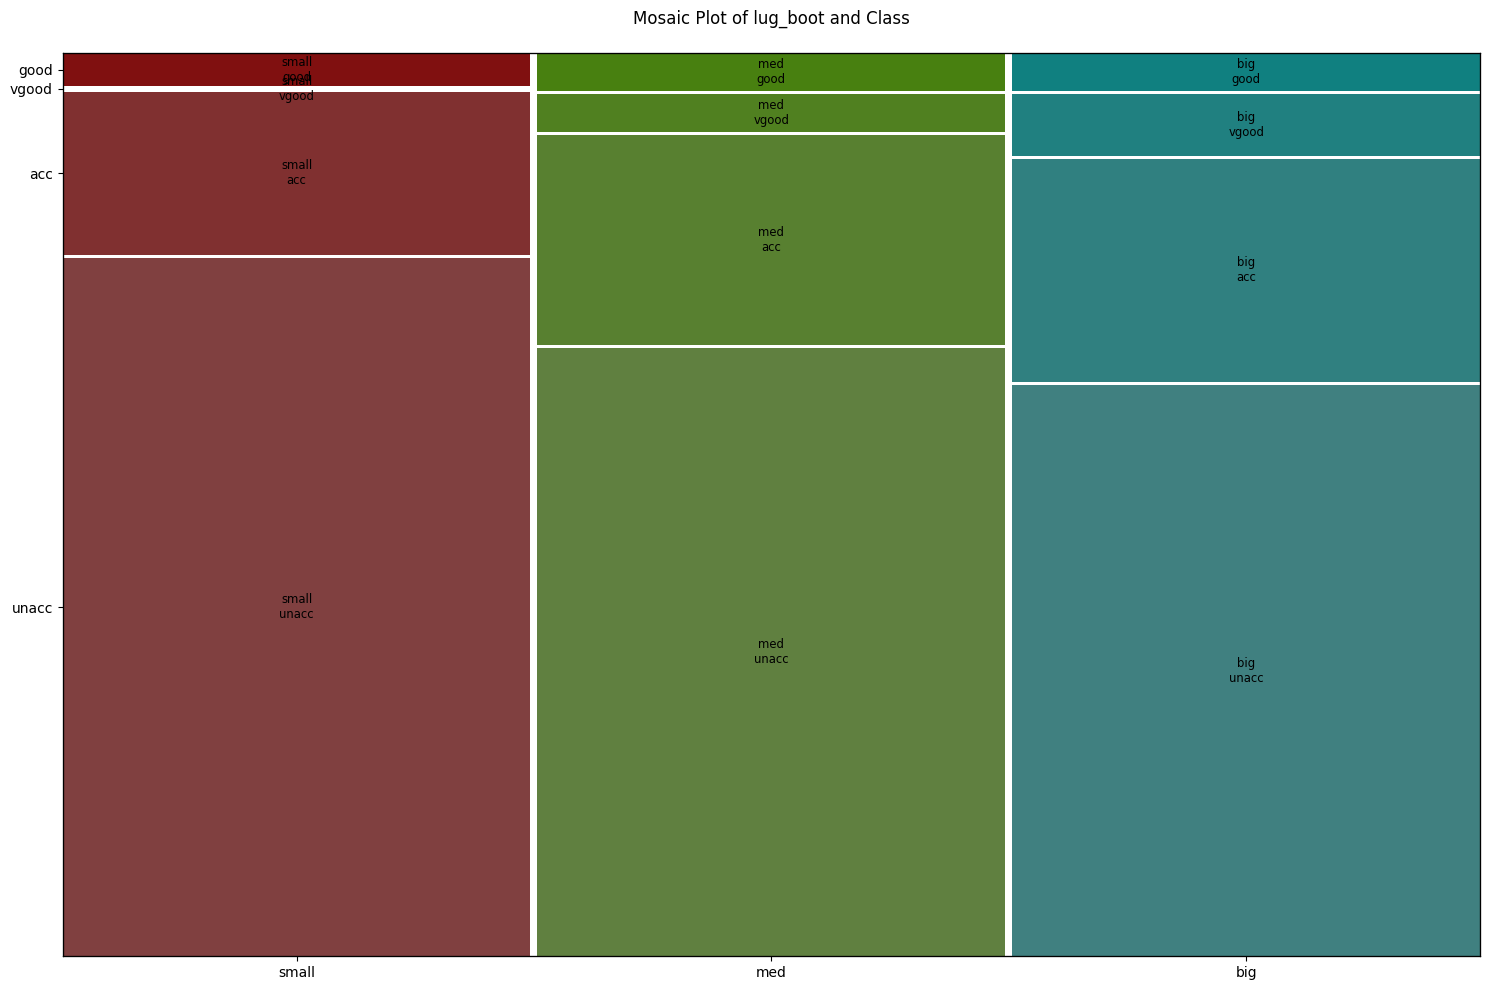

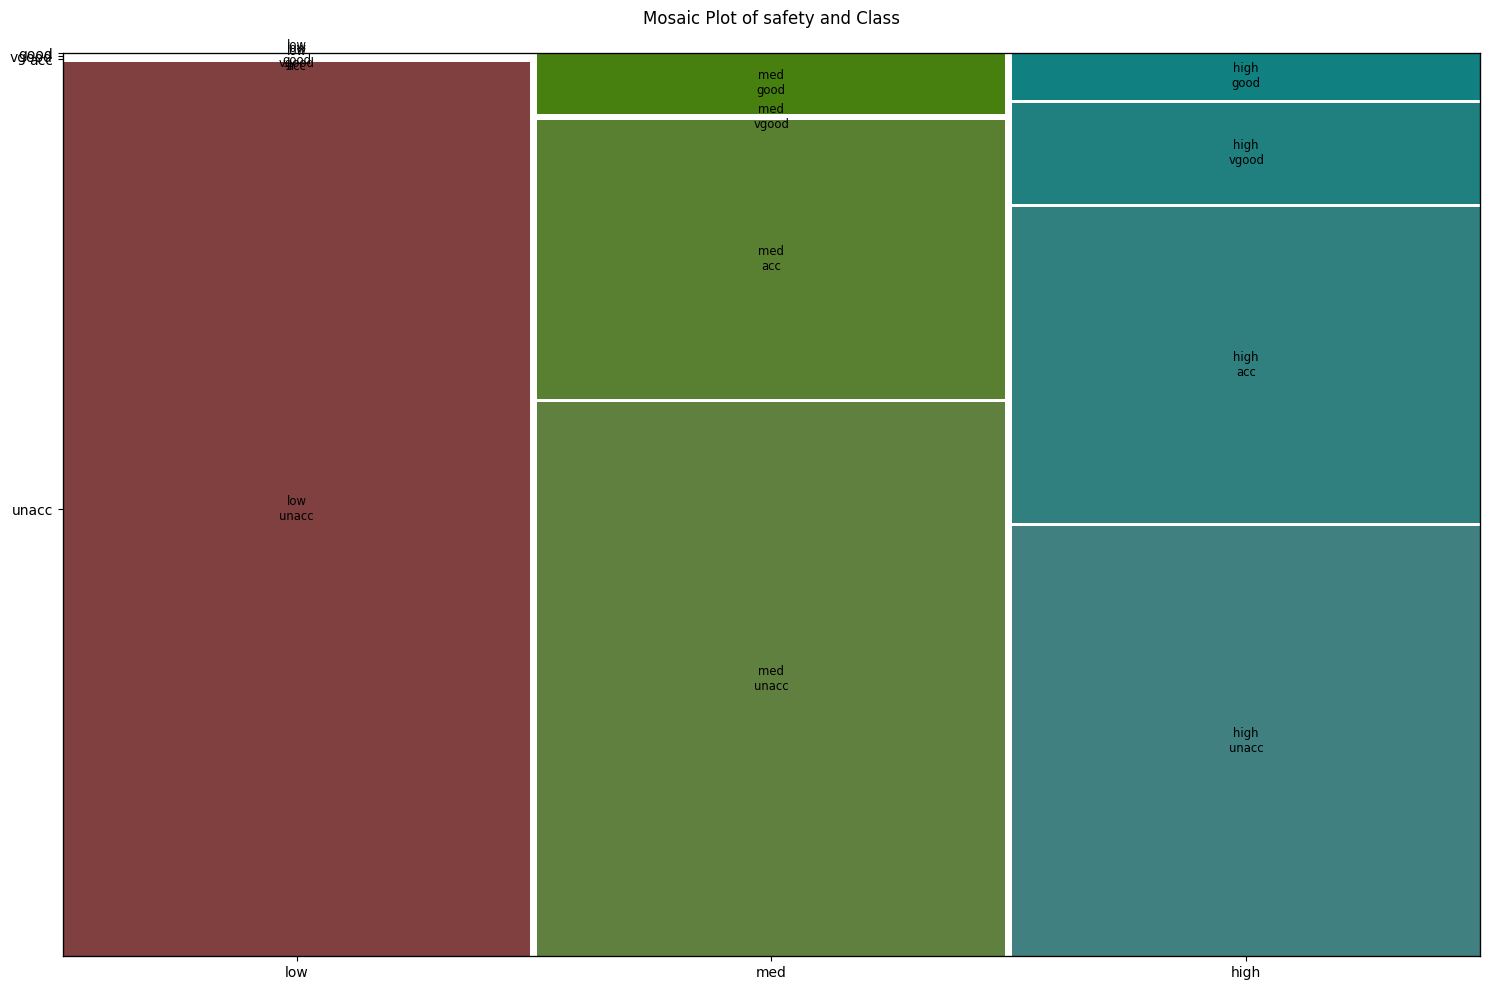

In [15]:
plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = True
for column in df.columns[:-1]:
    mosaic(df, [column, 'class'], title=f'Mosaic Plot of {column} and Class\n')
    plt.tight_layout()
    plt.show()

# 8. Parallel Coordinates Plot (using encoded data)

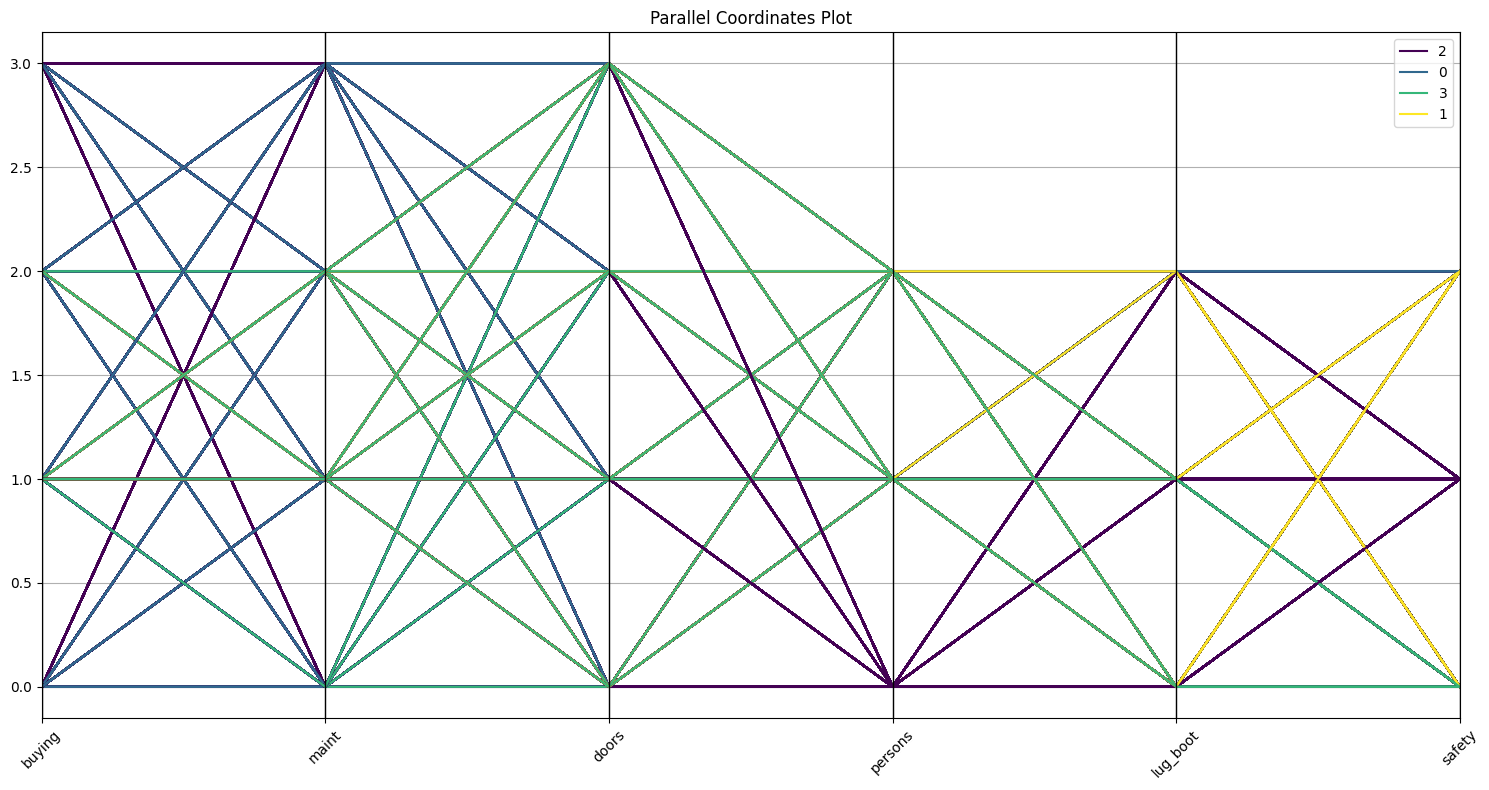

In [16]:
plt.figure(figsize=(15,8))
pd.plotting.parallel_coordinates(df_encoded, 'class', colormap='viridis')
plt.title('Parallel Coordinates Plot')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 9. Stacked Bar Plot for Feature-Class Proportions

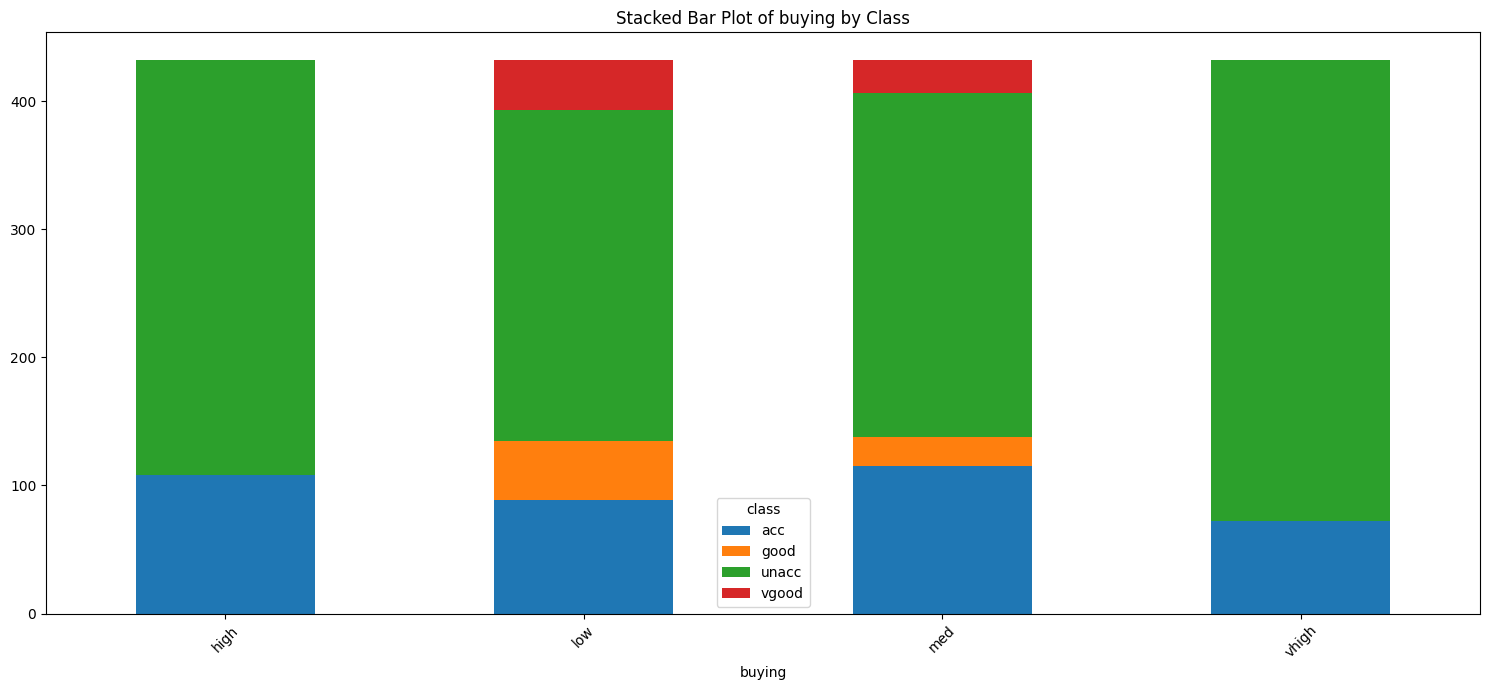

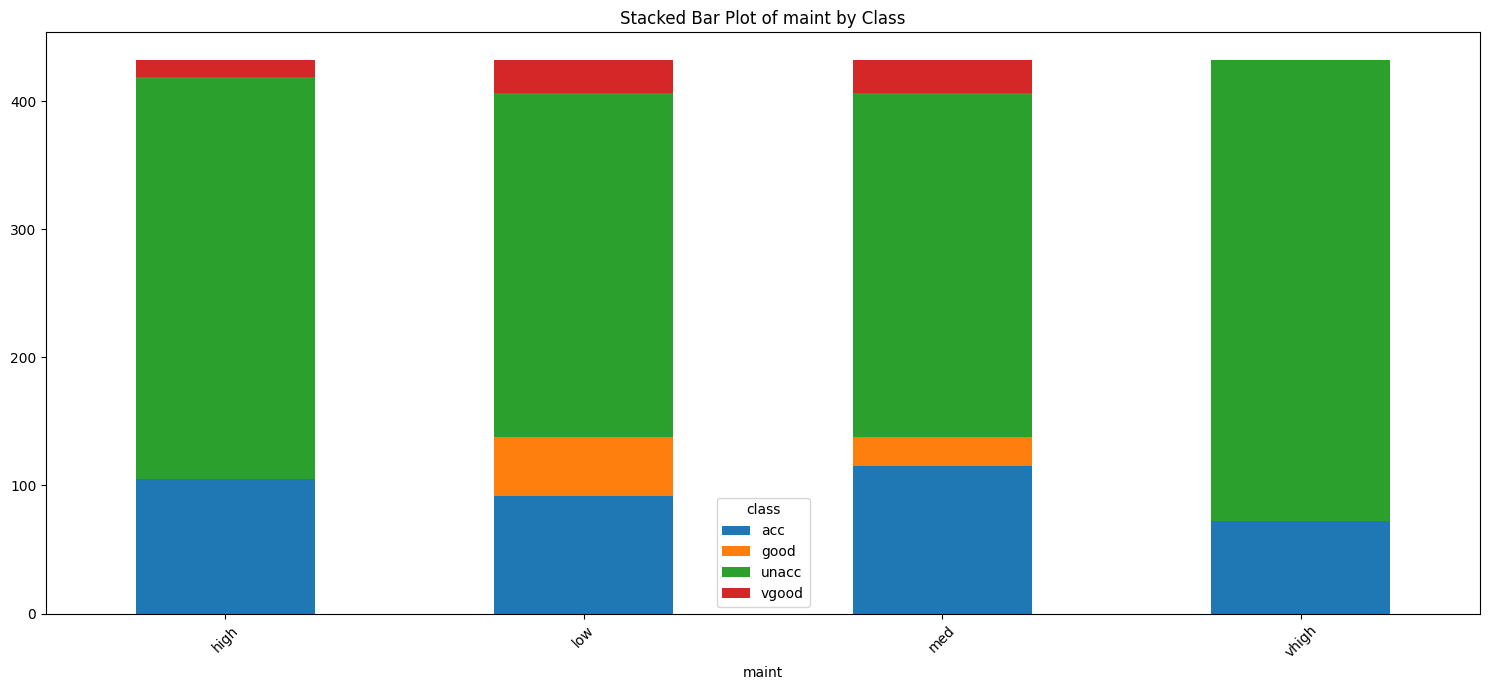

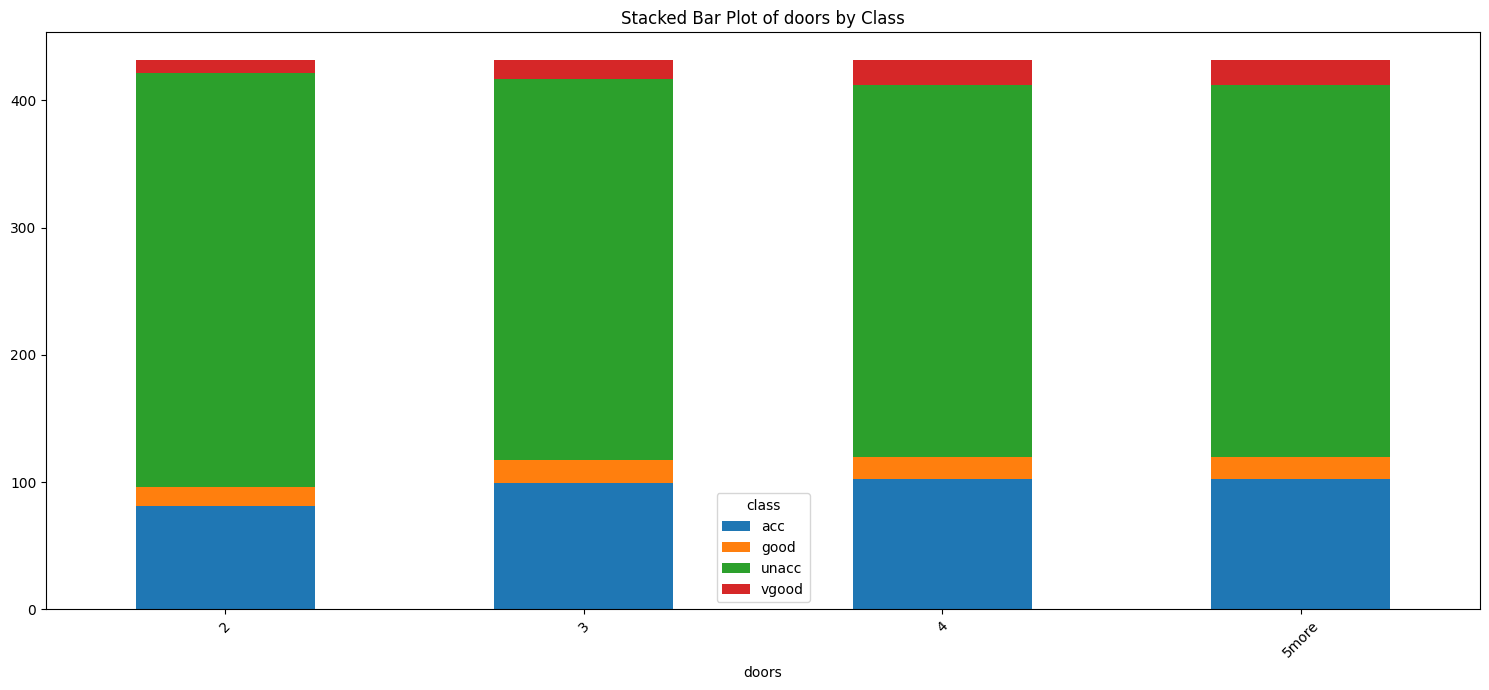

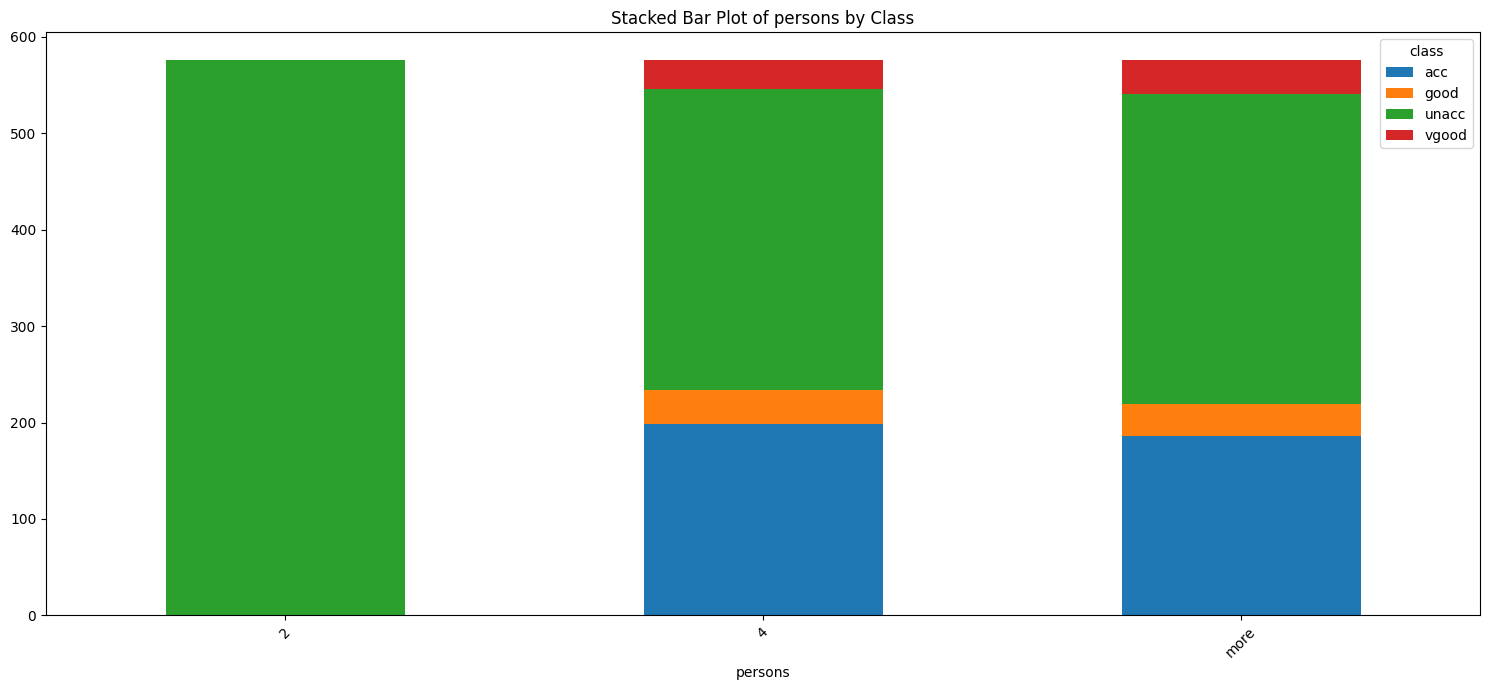

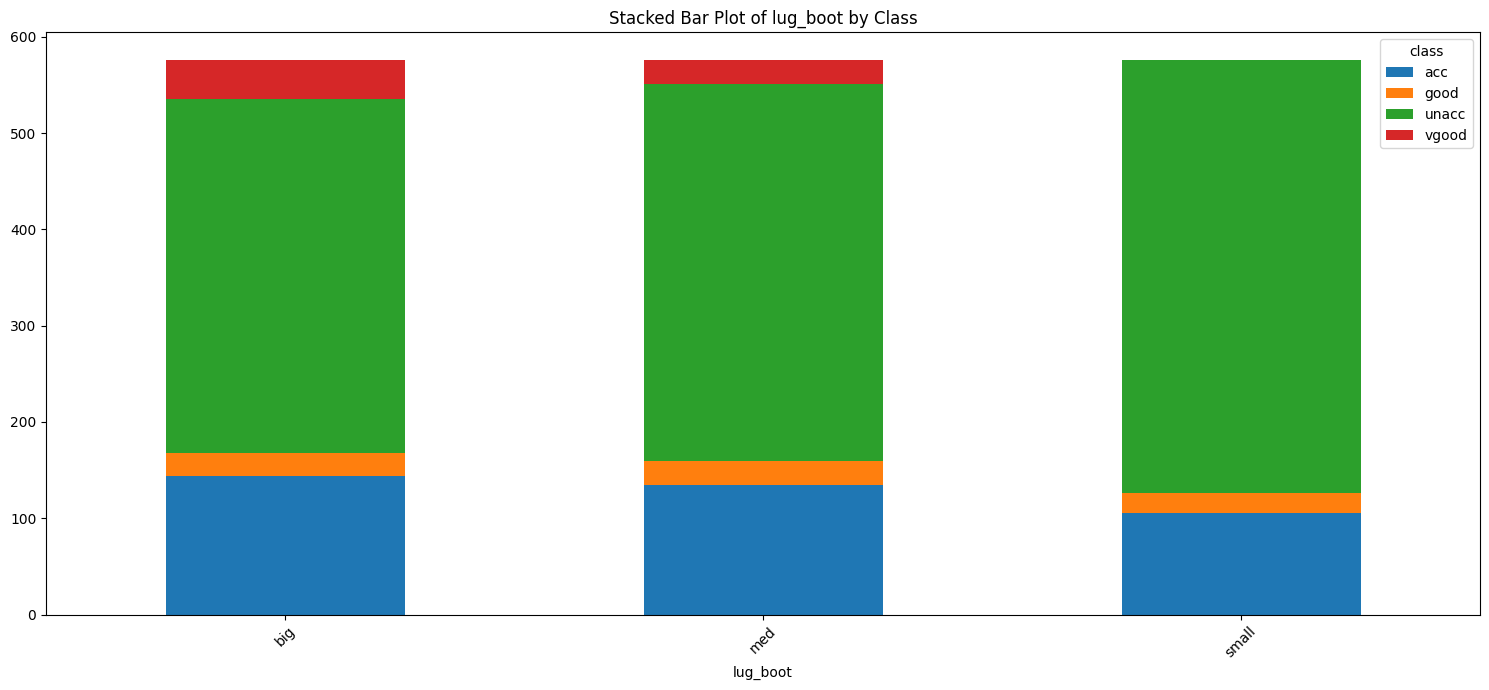

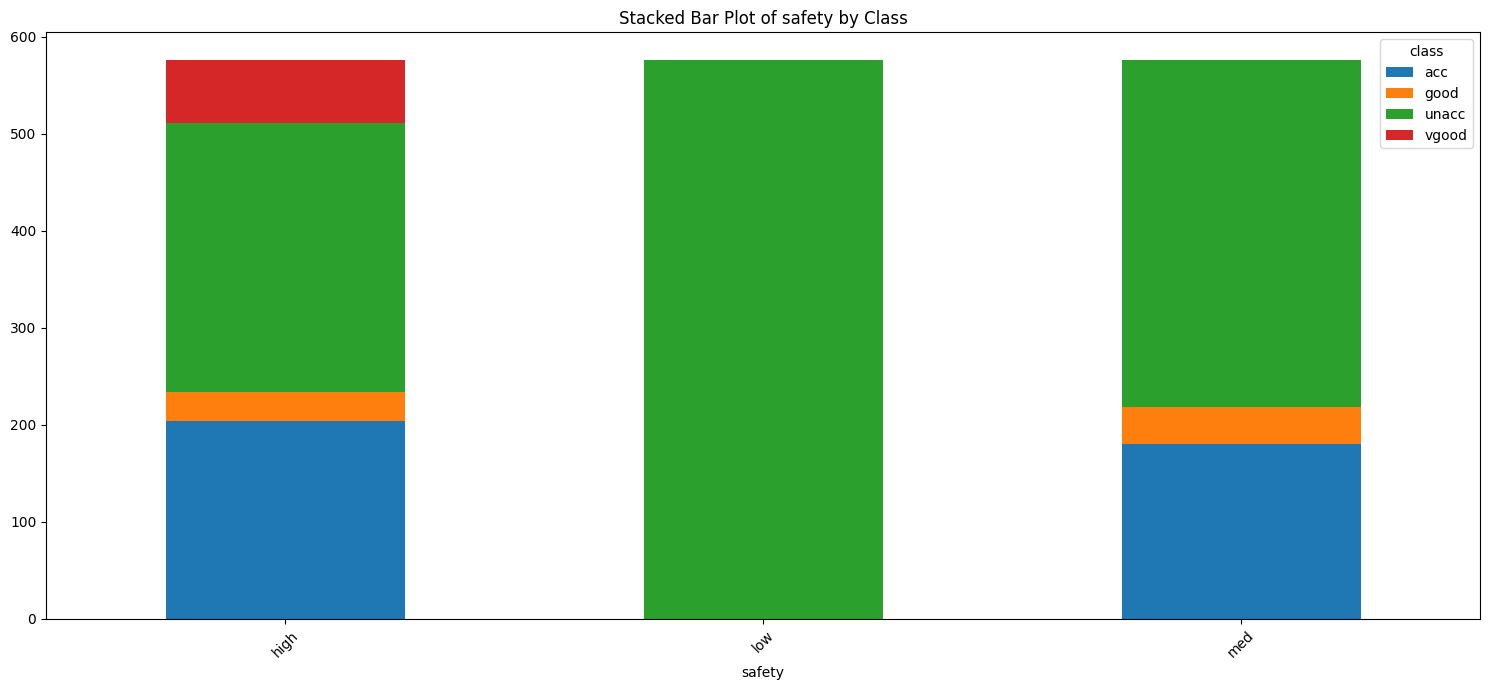

In [17]:
for column in df.columns[:-1]:

    pd.crosstab(df[column], df['class']).plot(kind='bar', stacked=True,figsize=(15,7))
    plt.title(f'Stacked Bar Plot of {column} by Class')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [18]:
df_encoded.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


# Features and labels

In [19]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Prediction

In [20]:
model=XGBClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

# Save model, metrics, and encoders using pickle

In [21]:

file = open('xgboost_classifier.pkl', 'wb')
pickle.dump(model, file)
file.close()

# Accuracy Score

In [22]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1score = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"F1 Score: {f1score}")

Accuracy: 0.9797687861271677
Precision Score: 0.9857807718463107
Recall Score: 0.9797687861271677
F1 Score: 0.9810742300075027


In [23]:
file = open('xgb_metrics.pkl', 'wb')
pickle.dump({'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1score': f1score}, file)
file.close()

# Confusion Matrix

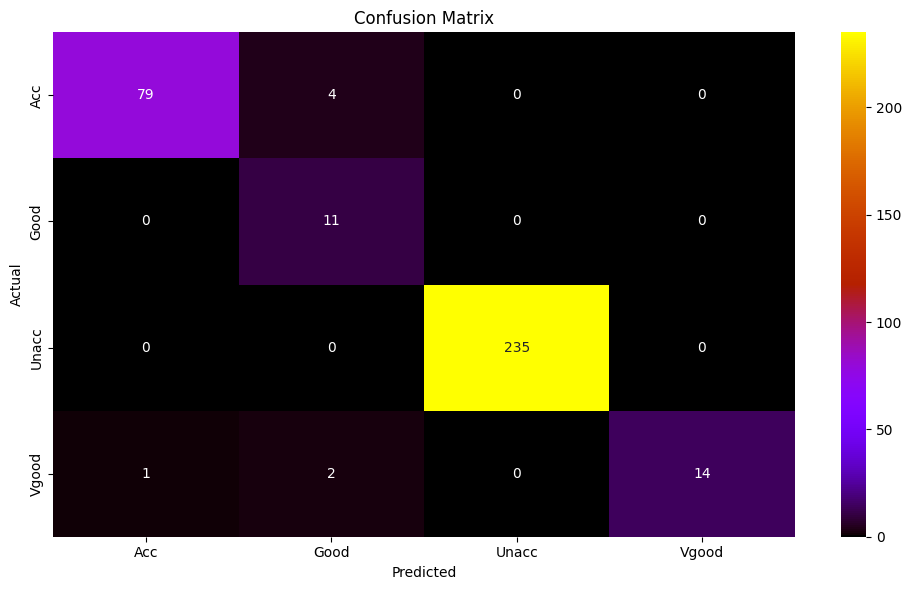

In [24]:
cm = confusion_matrix(y_test, y_pred)
label_name=["Acc","Good","Unacc","Vgood"]
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='gnuplot', xticklabels=label_name, yticklabels=label_name)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report

In [25]:
print(classification_report(y_test,y_pred,target_names=label_name))

              precision    recall  f1-score   support

         Acc       0.99      0.95      0.97        83
        Good       0.65      1.00      0.79        11
       Unacc       1.00      1.00      1.00       235
       Vgood       1.00      0.82      0.90        17

    accuracy                           0.98       346
   macro avg       0.91      0.94      0.91       346
weighted avg       0.99      0.98      0.98       346



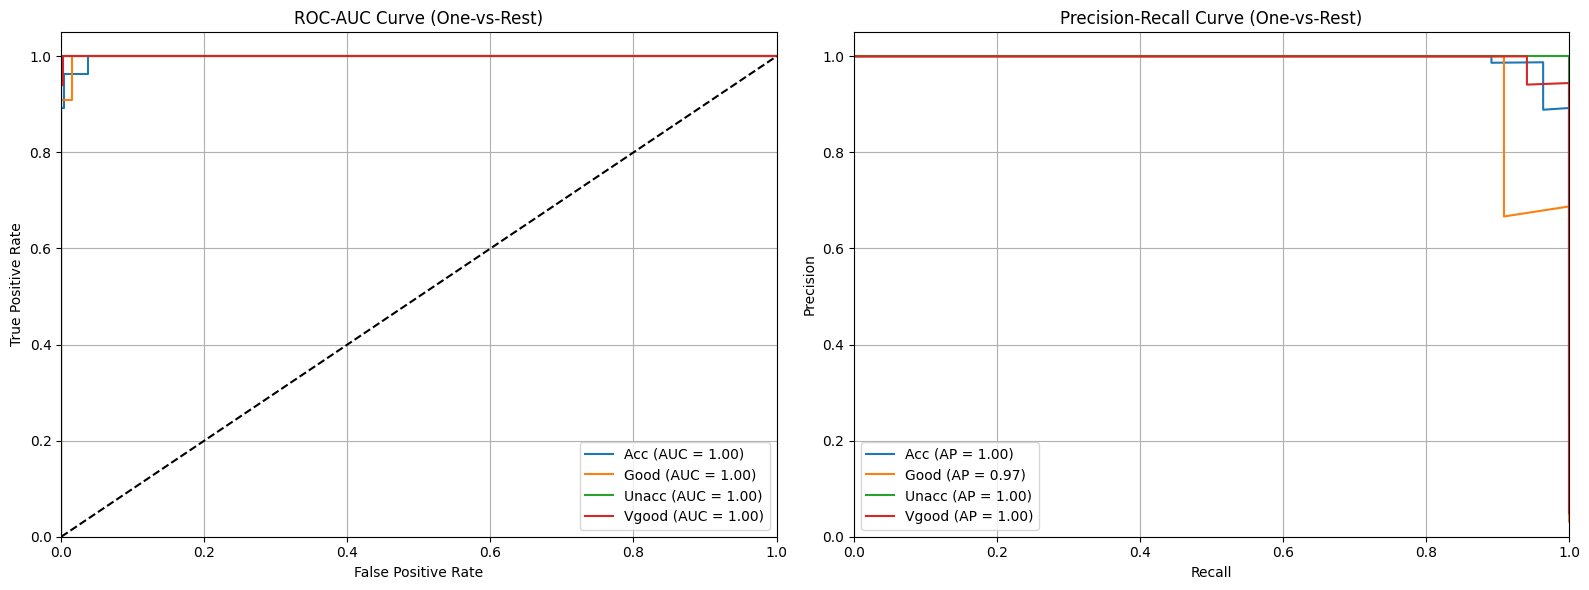

In [26]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, confusion_matrix
# Get predicted probabilities
y_score = model.predict_proba(X_test)

# Class labels
label_name = ["Acc", "Good", "Unacc", "Vgood"]

# Plot ROC-AUC and Precision-Recall curves side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# ROC-AUC Curve
for i in range(len(label_name)):
    # Binarize y_test for one-vs-rest
    y_test_bin = (y_test == i).astype(int)
    fpr, tpr, _ = roc_curve(y_test_bin, y_score[:, i])
    roc_auc = auc(fpr, tpr)
    ax1.plot(fpr, tpr, label=f'{label_name[i]} (AUC = {roc_auc:.2f})')

ax1.plot([0, 1], [0, 1], 'k--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC-AUC Curve (One-vs-Rest)')
ax1.legend(loc="lower right")
ax1.grid(True)

# Precision-Recall Curve
for i in range(len(label_name)):
    y_test_bin = (y_test == i).astype(int)
    precision, recall, _ = precision_recall_curve(y_test_bin, y_score[:, i])
    ap = average_precision_score(y_test_bin, y_score[:, i])
    ax2.plot(recall, precision, label=f'{label_name[i]} (AP = {ap:.2f})')

ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve (One-vs-Rest)')
ax2.legend(loc="lower left")
ax2.grid(True)

plt.tight_layout()
plt.show()

In [27]:
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)

In [28]:

file = open('rf_classifier.pkl', 'wb')
pickle.dump(rf, file)
file.close()

In [29]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1score_rf = f1_score(y_test, y_pred_rf, average='weighted')

print(f"Accuracy: {accuracy_rf}")
print(f"Precision Score: {precision_rf}")
print(f"Recall Score: {recall_rf}")
print(f"F1 Score: {f1score_rf}")

Accuracy: 0.9624277456647399
Precision Score: 0.9711327743809007
Recall Score: 0.9624277456647399
F1 Score: 0.9644829631618735


In [30]:
file = open('rf_metrics.pkl', 'wb')
pickle.dump({'accuracy': accuracy_rf, 'precision': precision_rf, 'recall': recall_rf, 'f1score': f1score_rf}, file)
file.close()

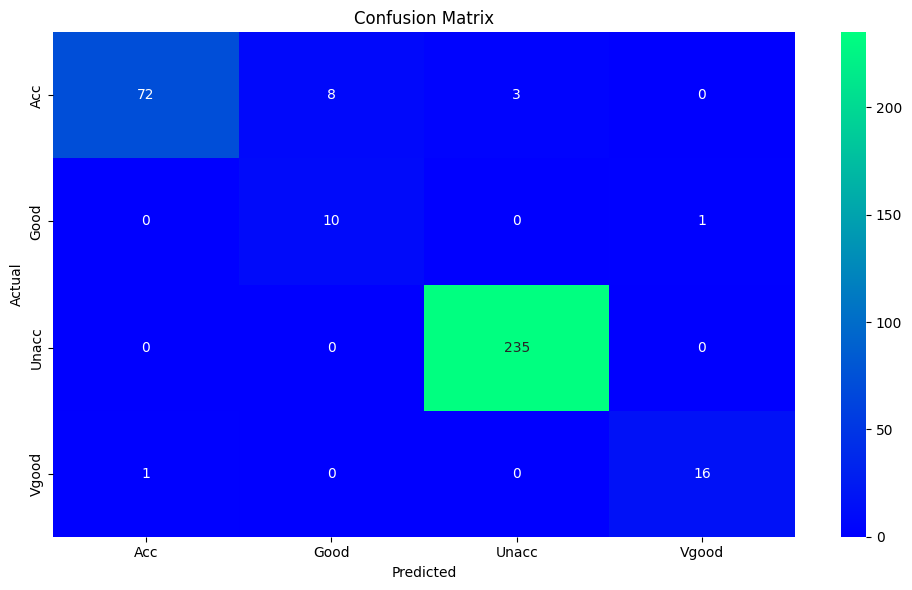

In [31]:
cm = confusion_matrix(y_test, y_pred_rf)
label_name=["Acc","Good","Unacc","Vgood"]
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='winter', xticklabels=label_name, yticklabels=label_name)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [32]:
print(classification_report(y_test,y_pred_rf,target_names=label_name))

              precision    recall  f1-score   support

         Acc       0.99      0.87      0.92        83
        Good       0.56      0.91      0.69        11
       Unacc       0.99      1.00      0.99       235
       Vgood       0.94      0.94      0.94        17

    accuracy                           0.96       346
   macro avg       0.87      0.93      0.89       346
weighted avg       0.97      0.96      0.96       346



In [33]:
cat=CatBoostClassifier(verbose=200)
cat.fit(X_train,y_train)
y_pred_cat=cat.predict(X_test)

Learning rate set to 0.080443
0:	learn: 1.2747397	total: 55.5ms	remaining: 55.5s
200:	learn: 0.0561815	total: 250ms	remaining: 992ms
400:	learn: 0.0246583	total: 436ms	remaining: 652ms
600:	learn: 0.0149292	total: 626ms	remaining: 416ms
800:	learn: 0.0105337	total: 814ms	remaining: 202ms
999:	learn: 0.0080893	total: 1.01s	remaining: 0us


In [34]:
file = open('cat_classifier.pkl', 'wb')
pickle.dump(rf, file)
file.close()

In [35]:
accuracy_cat = accuracy_score(y_test, y_pred_cat)
precision_cat = precision_score(y_test, y_pred_cat, average='weighted')
recall_cat = recall_score(y_test, y_pred_cat, average='weighted')
f1score_cat = f1_score(y_test, y_pred_cat, average='weighted')

print(f"Accuracy: {accuracy_cat}")
print(f"Precision Score: {precision_cat}")
print(f"Recall Score: {recall_cat}")
print(f"F1 Score: {f1score_cat}")

Accuracy: 0.9884393063583815
Precision Score: 0.9915221579961464
Recall Score: 0.9884393063583815
F1 Score: 0.9891858658718005


In [36]:
file = open('cat_metrics.pkl', 'wb')
pickle.dump({'accuracy': accuracy_cat, 'precision': precision_cat, 'recall': recall_cat, 'f1score': f1score_cat}, file)
file.close()

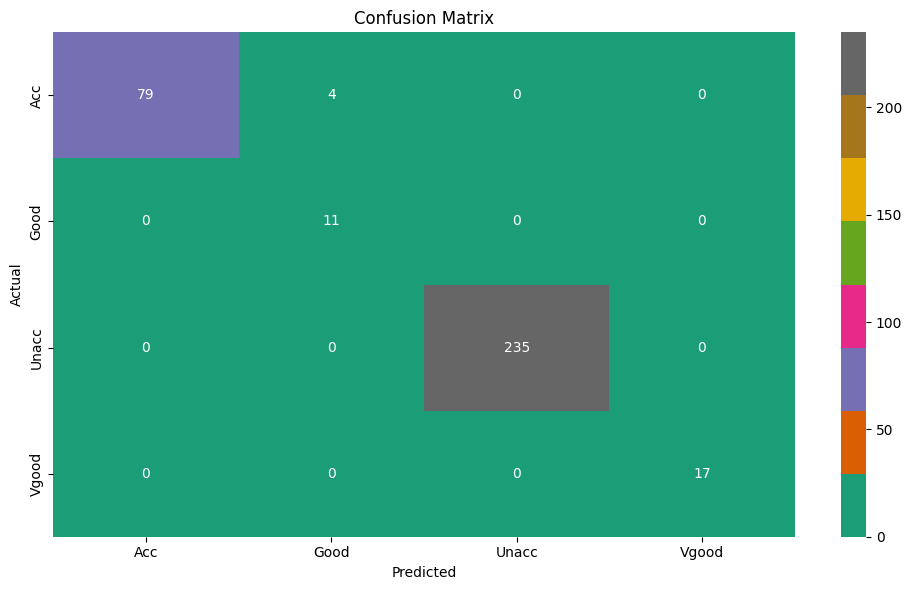

In [37]:
cm = confusion_matrix(y_test, y_pred_cat)
label_name=["Acc","Good","Unacc","Vgood"]
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Dark2', xticklabels=label_name, yticklabels=label_name)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [38]:
print(classification_report(y_test,y_pred_cat,target_names=label_name))

              precision    recall  f1-score   support

         Acc       1.00      0.95      0.98        83
        Good       0.73      1.00      0.85        11
       Unacc       1.00      1.00      1.00       235
       Vgood       1.00      1.00      1.00        17

    accuracy                           0.99       346
   macro avg       0.93      0.99      0.96       346
weighted avg       0.99      0.99      0.99       346

